# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# automatically restructures code to be easier to read
%load_ext nb_black

# libraires to help manipulate and read data
import numpy as np
import pandas as pd

# librarires for visualizing data
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# method for splitting data
from sklearn.model_selection import train_test_split

# creates decision tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

# tunes decision tree models
from sklearn.model_selection import GridSearchCV

# to perform statistical analysis
import scipy.stats as stats

# to build logistic regressionmodel for predicting
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# evaluate metric scores of models
from sklearn.metrics import (
 f1_score,
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    precision_recall_curve,
    roc_curve,
    roc_auc_score,
)


<IPython.core.display.Javascript object>

In [2]:
# saves the file as a dataframe called bookings
bookings = pd.read_csv("INNHotelsGroup.csv")
bookings.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [3]:
bookings.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<IPython.core.display.Javascript object>

In [4]:
bookings.shape

(36275, 19)

<IPython.core.display.Javascript object>

In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

In [6]:
bookings.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

In [7]:
for i in bookings:
    print(i)
    print(bookings[i].value_counts())
    print("-" * 50)

Booking_ID
INN34295    1
INN32798    1
INN04824    1
INN27267    1
INN34223    1
           ..
INN31262    1
INN06954    1
INN09534    1
INN30614    1
INN11886    1
Name: Booking_ID, Length: 36275, dtype: int64
--------------------------------------------------
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
--------------------------------------------------
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
--------------------------------------------------
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
--------------------------------------------------
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17

<IPython.core.display.Javascript object>

In [8]:
# determines the number of times that a room had niether a child or adult booked for the room
adults_0 = bookings[bookings["no_of_adults"] == 0]
adults_0[adults_0["no_of_children"] == 0].shape

(0, 19)

<IPython.core.display.Javascript object>

In [9]:
bookings[bookings.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

## Data Overview

- Observations
    - Booking_ID has no repeating values, meaning that each booking is seperate from the rest.
    - There are no null values in the data.
    - There are no duplicate values in the data.
    - There are bookings that have 0 adults and 0 children, but none of the booking have both.
        - Meaning that there are no false bookings with no people in it.
    - no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, lead_time, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests all have right skewed distrobution plots.
    - There are 3 bookings with 9 or 10 children in it. This seems like an outlier and those bookings should be deleted since the nearest value is 3.
    - room_type should be changed from Room_Type 1 to just 1, same goes for 2, 3, 4, 5, 6, and 7. Same should be done with type_of_meal_plan

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
def histogram_boxplot(
    data, feature, figsize=(15, 10), kde=False, bins=None, save_title=""
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

    plt.savefig((save_title + ".jpg"), bbox_inches="tight")  # saves plot as JPEG
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Univariate Analysis

#### Number of Adults

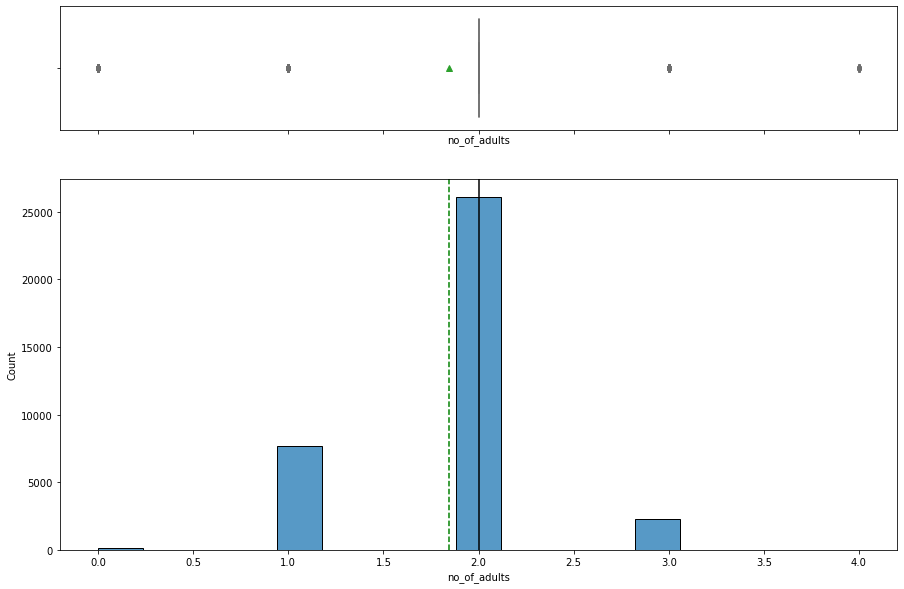

<IPython.core.display.Javascript object>

In [11]:
histogram_boxplot(
    bookings, "no_of_adults", save_title="hist_boxplot_no_of_adults"
)  # plots boxplot and histogram of no_of_adults

##### Observations:
    - Majority of the data is with 2 adults. The oultiers do not need to be treated since theyre possible, yet not likely.
    - It is understandable that there are usually 2 adults and couples are more likely ot take trips together.

#### Number of Children

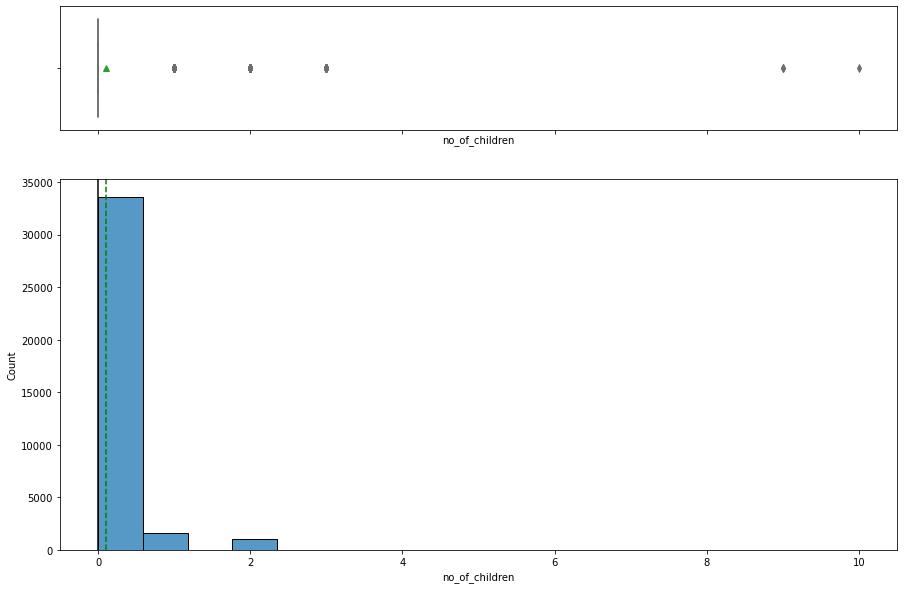

<IPython.core.display.Javascript object>

In [12]:
histogram_boxplot(
    bookings, "no_of_children", save_title="hist_boxplot_no_of_children"
)  # plots boxplot and histogram of no_of_children

##### Observations:
    - Majority of the data is with 0 children. The oultiers need to be treated for the values past 8 since they're highly unlikely and so small in occurence that deleting them will not effect the data.

#### Number of Weekend Nights

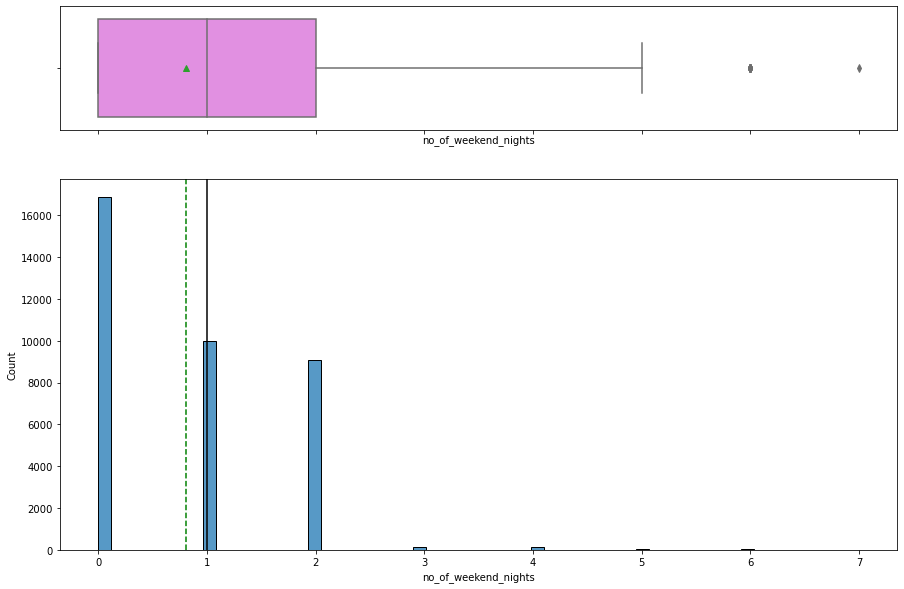

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(
    bookings, "no_of_weekend_nights", save_title="hist_boxplot_no_of_weekend_nights"
)  # plots boxplot and histogram of no_of_weekend_nights

##### Observations:
    - Majority of the data is with 2 adults. The oultiers do not need to be treated since theyre possible, yet not likely.
    - It is understandable that there are usually 2 adults and couples are more likely ot take trips together.

#### Number of Week Nights

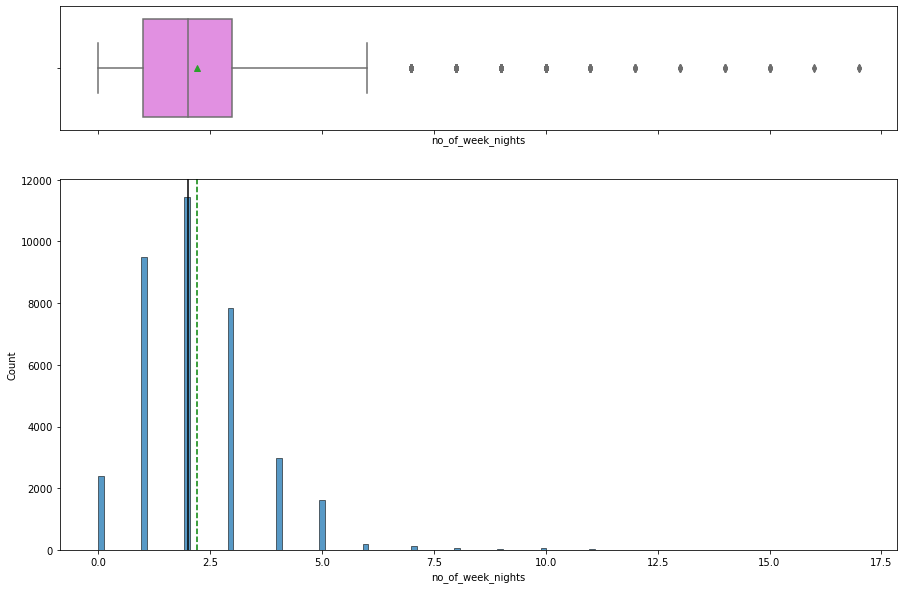

<IPython.core.display.Javascript object>

In [14]:
histogram_boxplot(
    bookings, "no_of_week_nights", save_title="hist_boxplot_no_of_week_nights"
)  # plots boxplot and histogram of no_of_week_nights

##### Observations:
    - Outliers are present, may need to treat outliers, but data seems needed as is, so i will probably leave it.

#### Required Car Parking Space

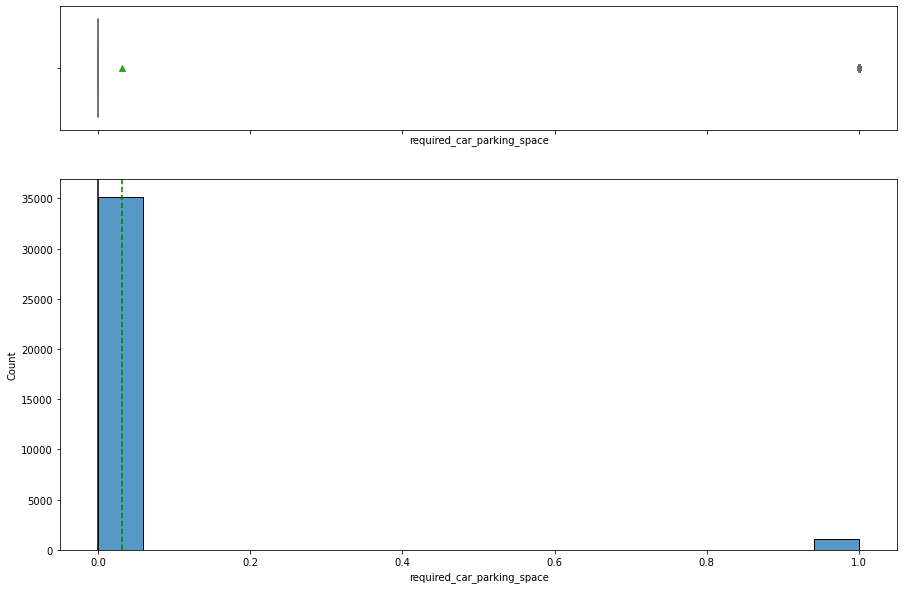

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(
    bookings,
    "required_car_parking_space",
    save_title="hist_boxplot_required_car_parking_space",
)  # plots boxplot and histogram of required_car_parking_space

##### Observations:
    - Required car parking space is a boolean value, so their are no outliers, and no action is needed. It is good to note that almost all the time parking is not required.

#### Lead Time

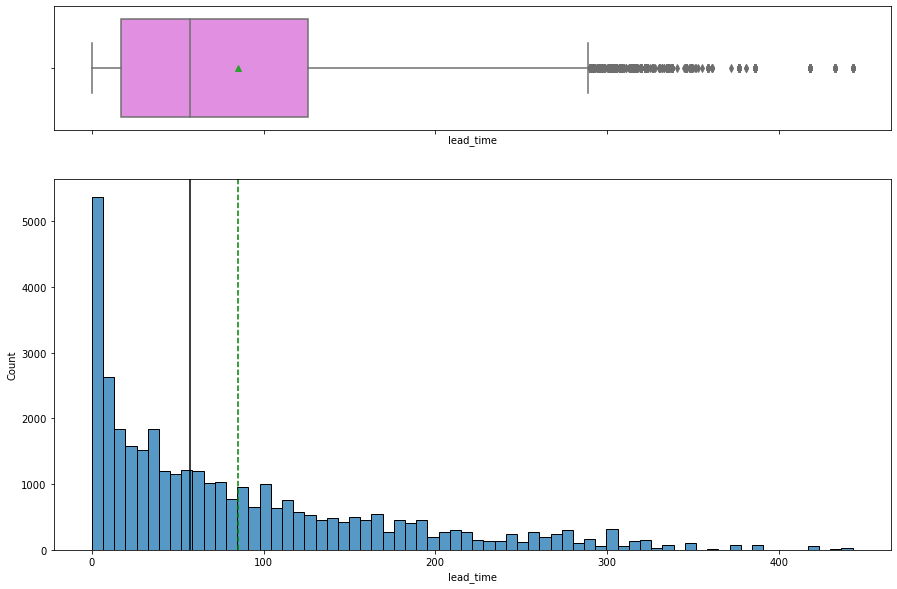

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(
    bookings, "lead_time", save_title="hist_boxplot_lead_time"
)  # plots boxplot and histogram of lead_time

##### Observations:
    - Lead time is a column of continuos values with outlier. Outliers may need to be treated here.
    - Lead time is the number of days between the day of the booking and the arrival.
    - Most bookings are made with a lead time of a few days, but it is not rare to book months in advance.

#### Arrival Year

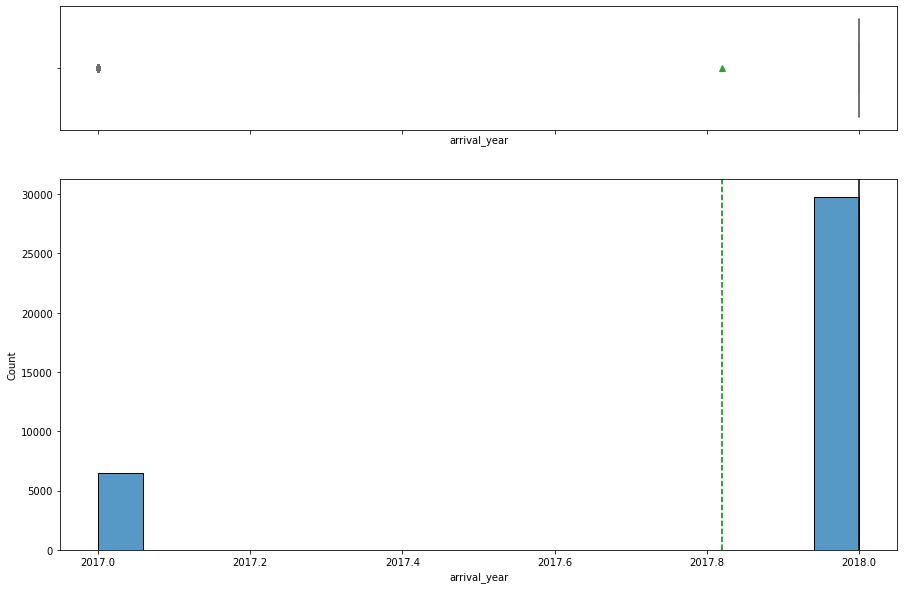

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(
    bookings, "arrival_year", save_title="hist_boxplot_arrival_year"
)  # plots boxplot and histogram of arrival_year

##### Observations:
    - The data is comprised of only two years, 2017 and 2018. 2018 is the year the majority of the bookings were made.
    - No outlier treatment needed.

#### Arrival Month

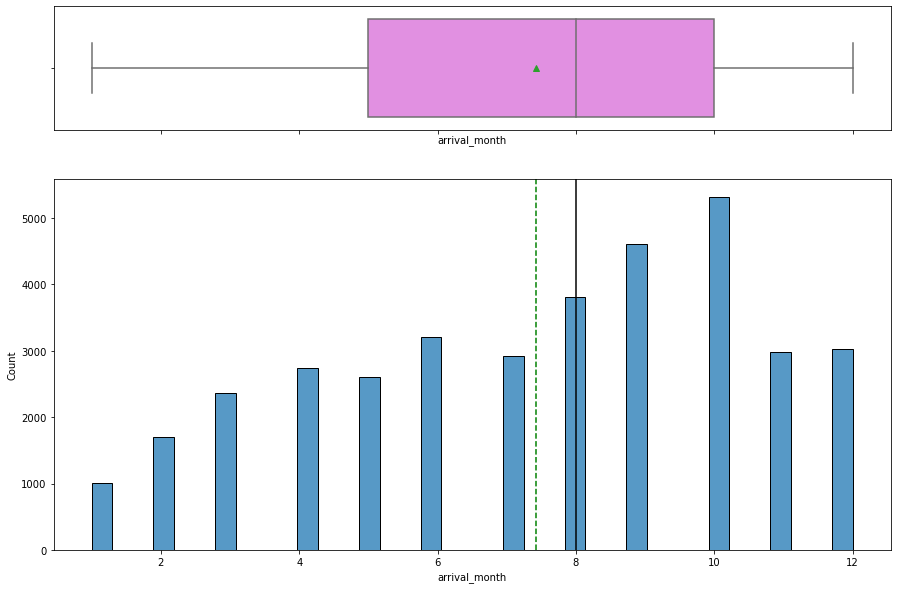

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(
    bookings, "arrival_month", save_title="hist_boxplot_arrival_month"
)  # plots boxplot and histogram of arrival_month

##### Observations:
    - Arrival month seems almost evenly spread out, which causes there to be no outliers.
    - Ocotber is the most popular month for booking arrivals.
    - The later/cooler months are the most popular.

#### Arrival Date

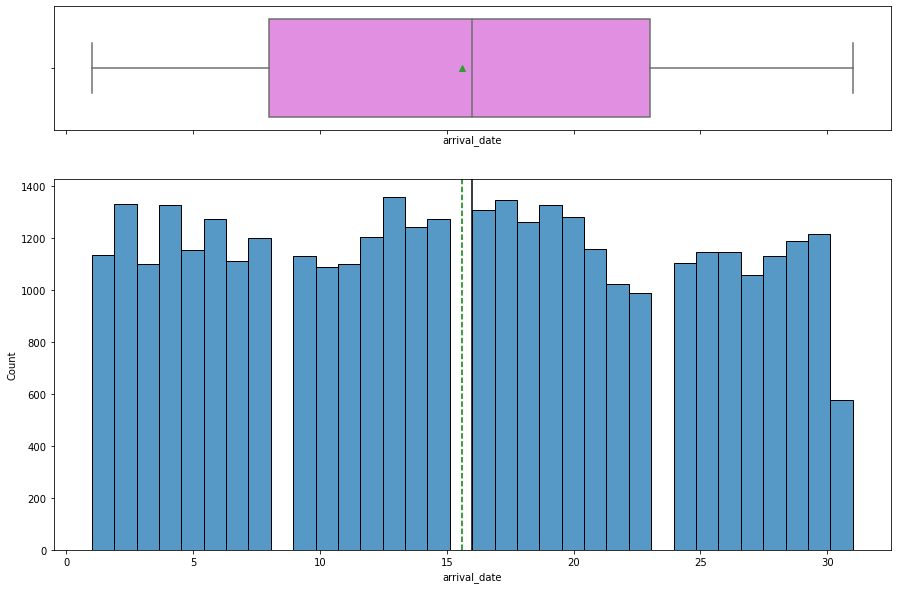

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(
    bookings, "arrival_date", save_title="hist_boxplot_arrival_date"
)  # plots boxplot and histogram of arrival_date

##### Observations:
    - Arrival date is evenyly spread throughout the days. There is no real pattern descerning which of the days has the most bookings

#### Repeated Guest

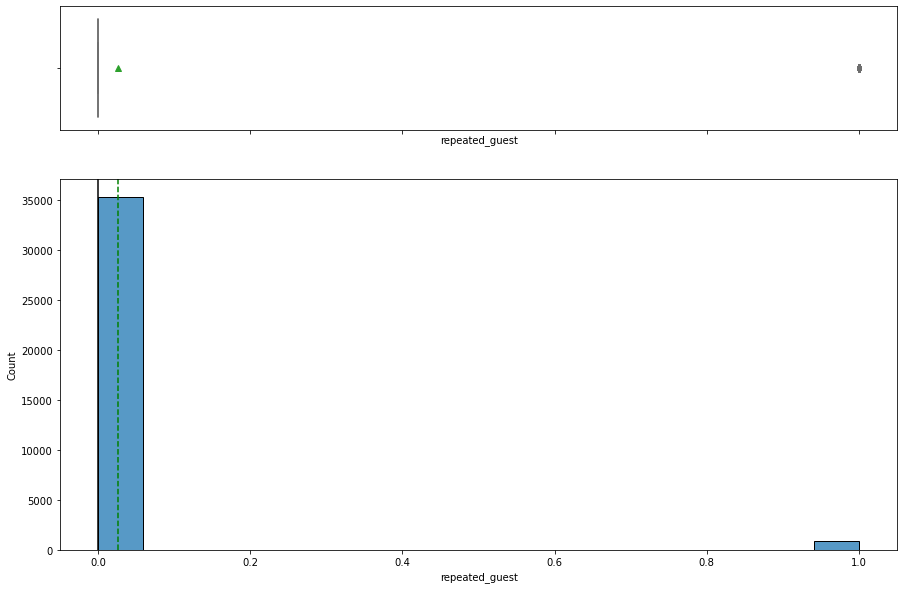

<IPython.core.display.Javascript object>

In [20]:
histogram_boxplot(
    bookings, "repeated_guest", save_title="hist_boxplot_repeated_guest"
)  # plots boxplot and histogram of repeated_guest

##### Observations:
    - boolean values giving True or False statement for if a custmer is a repeating guest or not.
    - Majority of the guests are 1 time customers.

#### Number of Previous Cancellations

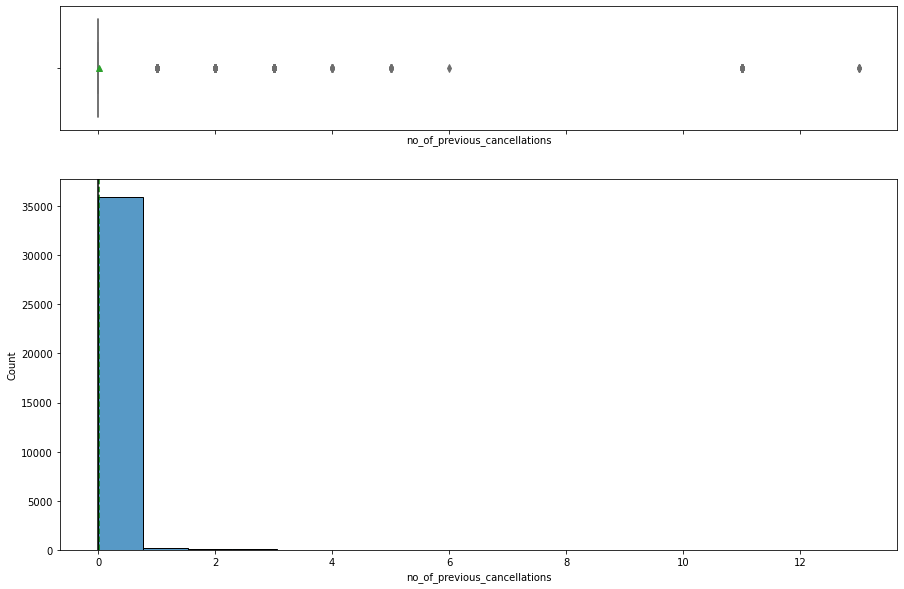

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(
    bookings,
    "no_of_previous_cancellations",
    save_title="hist_boxplot_no_of_previous_cancellations",
)  # plots boxplot and histogram of no_of_previous_cancellations

##### Observations:
    - Number of previous cancellations counts the amount of cancellations made by previously by the guest booking the reservation.
    - There are obvious outliers past 10 that may need to be treated.
    - The heavy majority of bookings have not previously cancelled a reservation.

#### Number of Previous Bookings Not Canceled

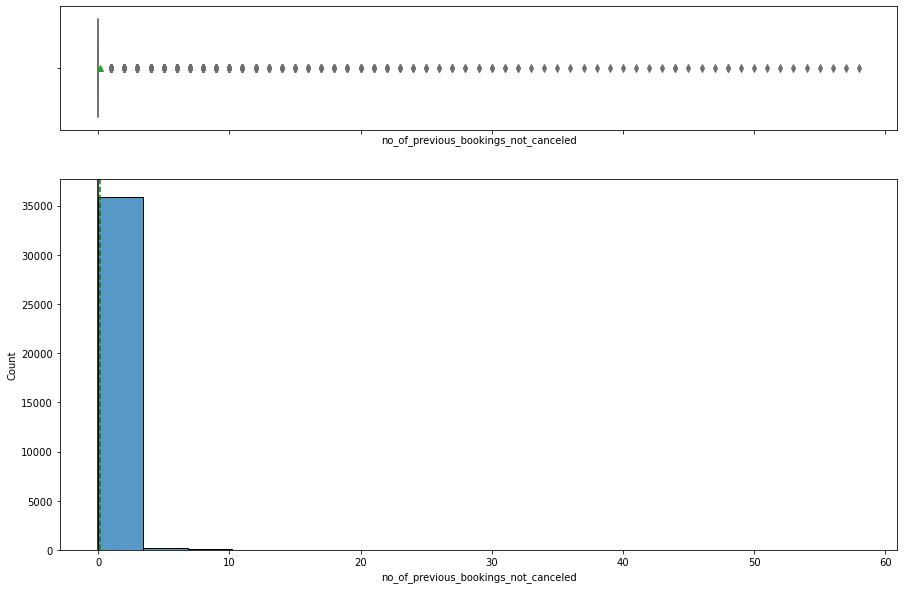

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(
    bookings,
    "no_of_previous_bookings_not_canceled",
    save_title="hist_boxplot_no_of_previous_bookings_not_canceled",
)  # plots boxplot and histogram of no_of_previous_bookings_not_canceled

##### Observations:
    - 0 is the heavy majority for the number of previous bookings that were not canceled.
    - Outliers are present but wil probablt not be treated

#### Average Price Per Room

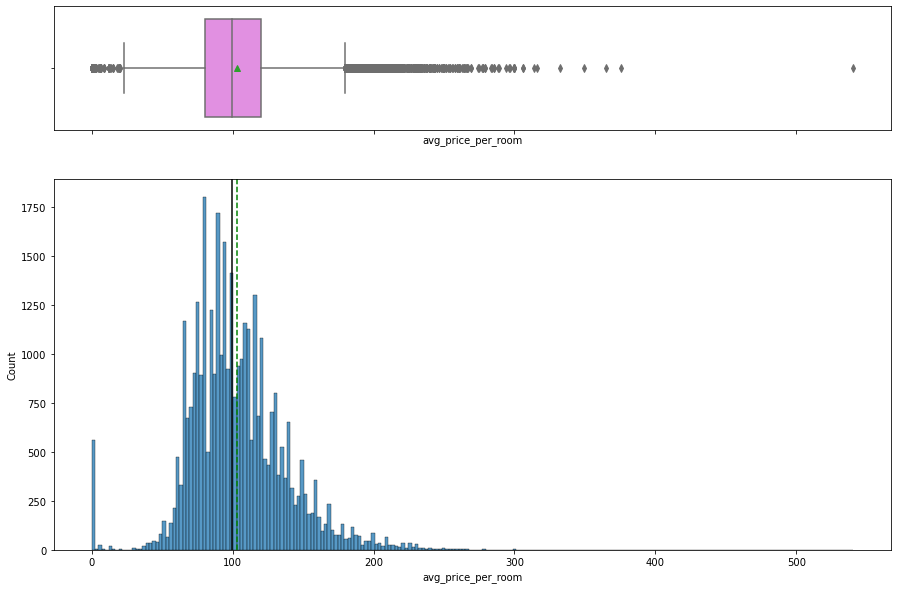

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(
    bookings, "avg_price_per_room", save_title="hist_boxplot_avg_price_per_room"
)  # plots boxplot and histogram of avg_price_per_room

In [24]:
bookings["avg_price_per_room"].value_counts()[0]

545

<IPython.core.display.Javascript object>

##### Observations:
    - Average price per room is noramally ar about $100
- There were quite a bit of bookings for $0, this will have to be looked into as free bookings seem too common.

#### Number of Special Requests

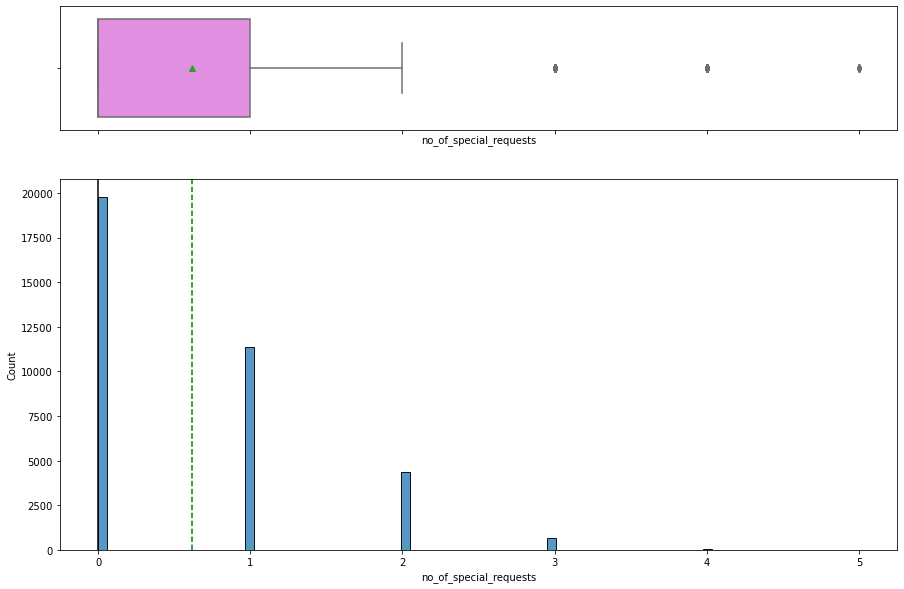

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(
    bookings, "no_of_special_requests", save_title="hist_boxplot_no_of_special_requests"
)  # plots boxplot and histogram of no_of_special_requests

##### Observations:
    - Outliers do not seeem abnormal.
    - Most of the time no one submits a special request.

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, save_title=""):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.savefig((save_title + ".jpg"), bbox_inches="tight")  # saves plot as JPEG
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

Title: no_of_adults


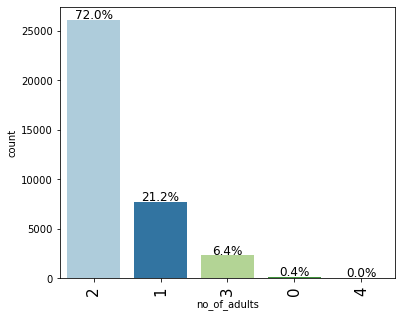

Title: no_of_children


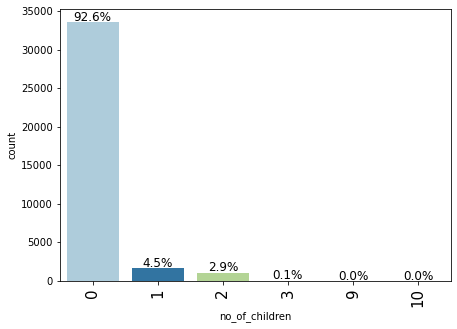

Title: no_of_weekend_nights


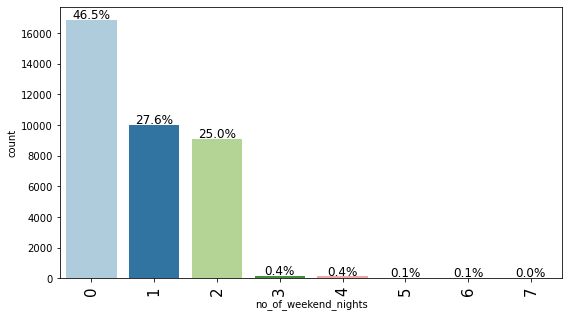

Title: no_of_week_nights


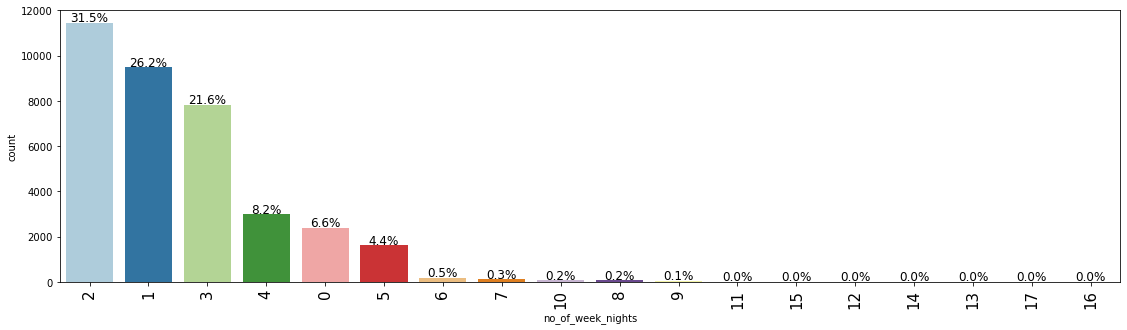

Title: type_of_meal_plan


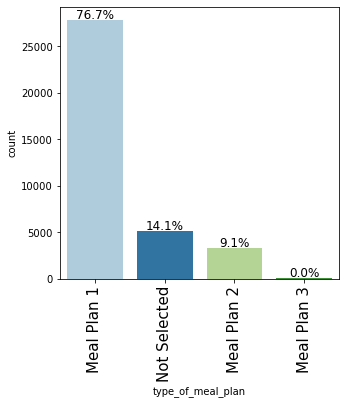

Title: required_car_parking_space


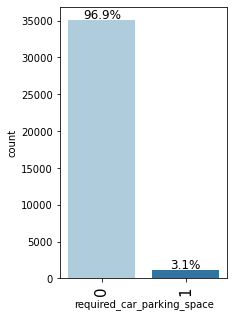

Title: room_type_reserved


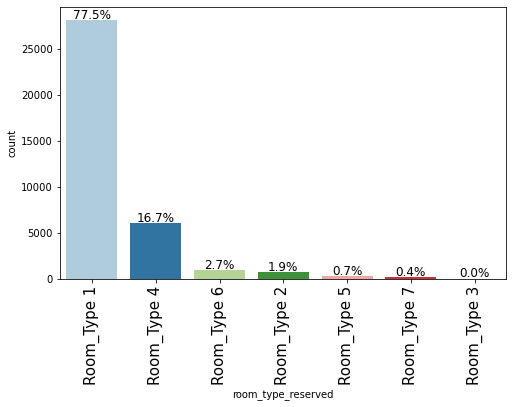

Title: arrival_year


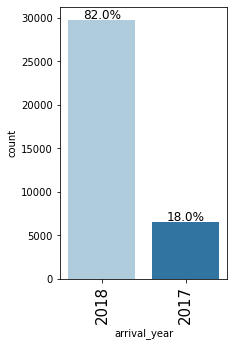

Title: arrival_month


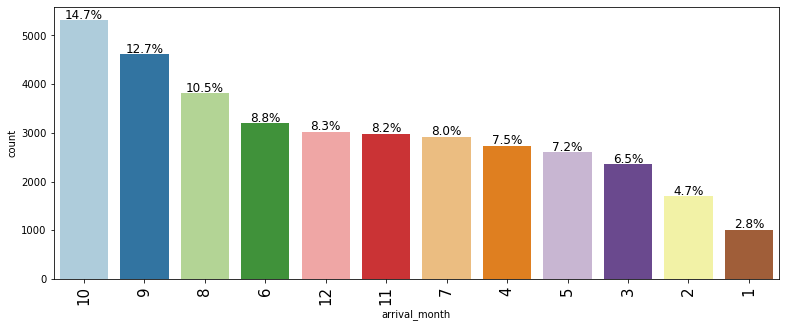

Title: market_segment_type


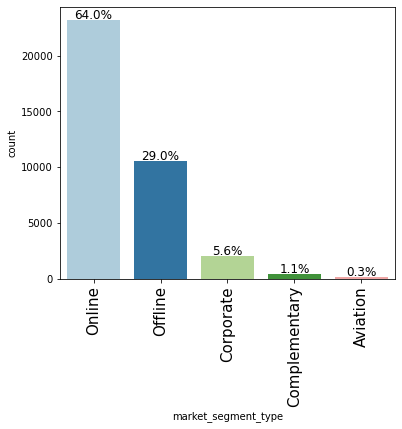

Title: repeated_guest


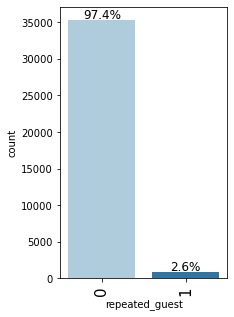

Title: no_of_previous_cancellations


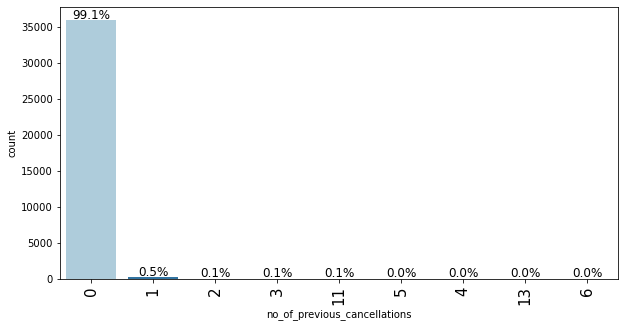

Title: no_of_special_requests


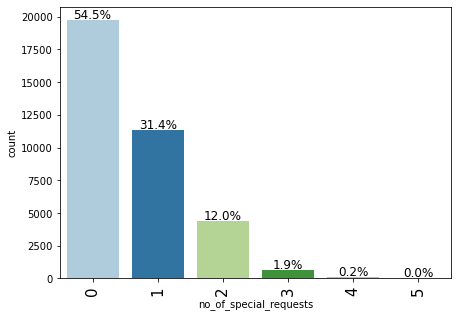

Title: booking_status


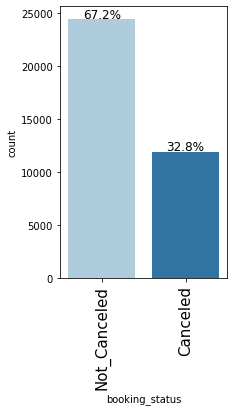

<IPython.core.display.Javascript object>

In [27]:
col_list = bookings.columns  # creates list of columns in data

# drops the columns that have too many values, or are continuos values
col_list = col_list.drop(
    [
        "Booking_ID",
        "lead_time",
        "arrival_date",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
    ]
)
col_list

# prints out labeled barplot of each column in the data set with the respective percentages for each value in the feature
for i in col_list:
    print("Title:", i)
    labeled_barplot(bookings, i, perc=True, save_title=(i + "_labeled_barplot"))
    plt.show()

### Bivariate Analysis

In [28]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### Booking Status vs Number of Adults

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


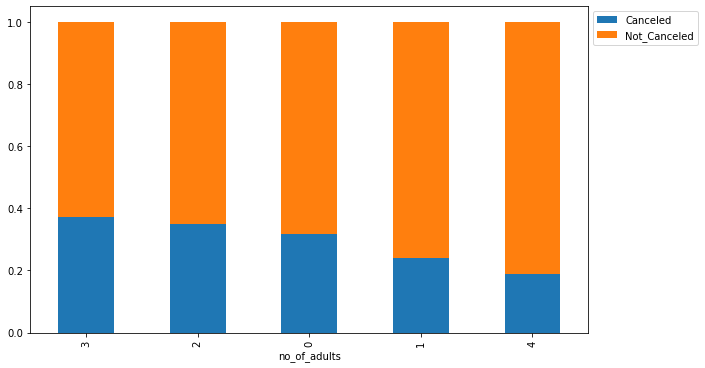

<IPython.core.display.Javascript object>

In [29]:
stacked_barplot(
    bookings, "no_of_adults", "booking_status"
)  # creates stacked barplot of booking status with respect to number of adults

##### Observations:
    - The booking status is more for non canceled than canceled. The status is not dependant on the amount of adults.

### Booking Status vs Number of Children

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


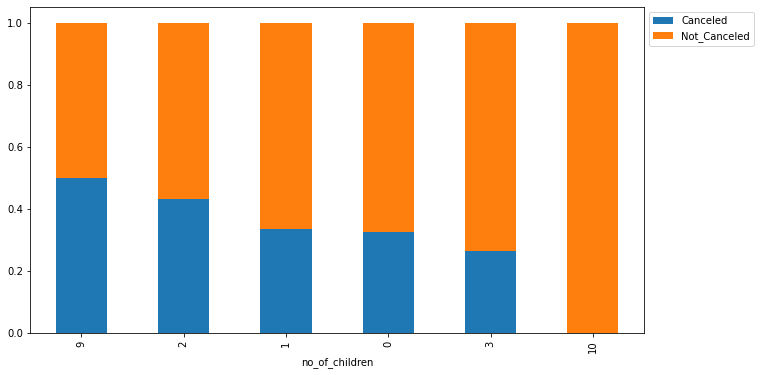

<IPython.core.display.Javascript object>

In [30]:
stacked_barplot(
    bookings, "no_of_children", "booking_status"
)  # creates stacked barplot of booking status with respect to number of children

##### Observations:
    - 0 is the most popular amount of children, meeaning between that and the number of adults, it is safe to assume most reservations are either business associates sharing a room or couples with no children. There is no relationship between no_of_children adn booking status.

### Booking Status vs Number of Weekend Nights

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


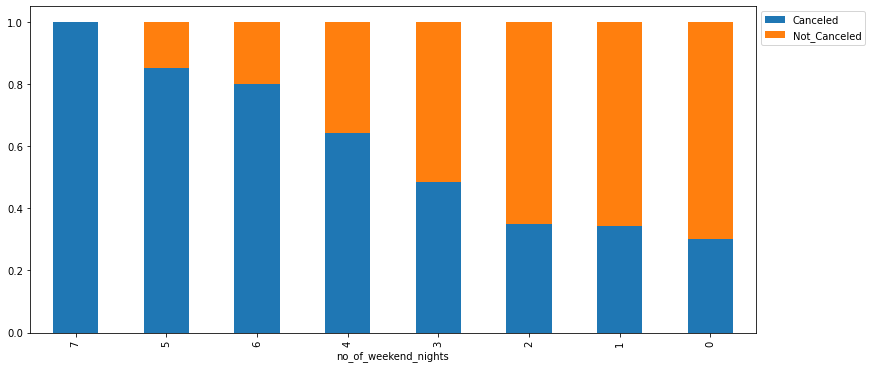

<IPython.core.display.Javascript object>

In [31]:
stacked_barplot(
    bookings, "no_of_weekend_nights", "booking_status"
)  # creates stacked barplot of booking status with respect to number of weekend nights

##### Observations:
    - It seems safe to say that the greater the number of weekend nights that are reserved the greater the chance will be that a reservation is canceled.

### Booking Status vs Number of Week Nights

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

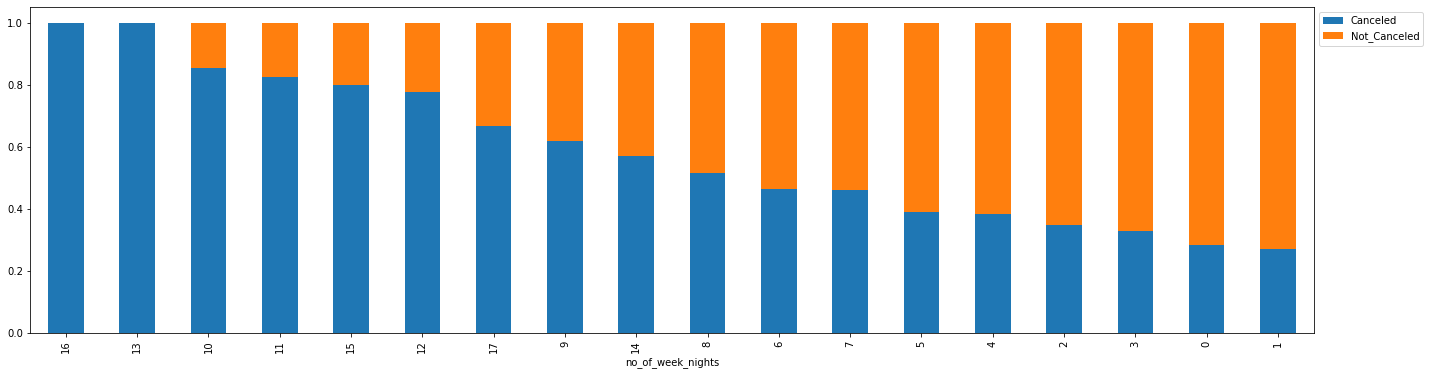

<IPython.core.display.Javascript object>

In [32]:
stacked_barplot(
    bookings, "no_of_week_nights", "booking_status"
)  # creates stacked barplot of booking status with respect to number of week nights

##### Observations:
    - It is safe to sat that the greater the number of week nights that are reserved the greater the chance will be that a reservation is canceled. Between this graph and the previous graph for number of weekend nights, it is safe to assume the greater the number of total nights reserved, the greater the chance that a reservation will be canceled.

### Booking Status vs Type of Meal Plan

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


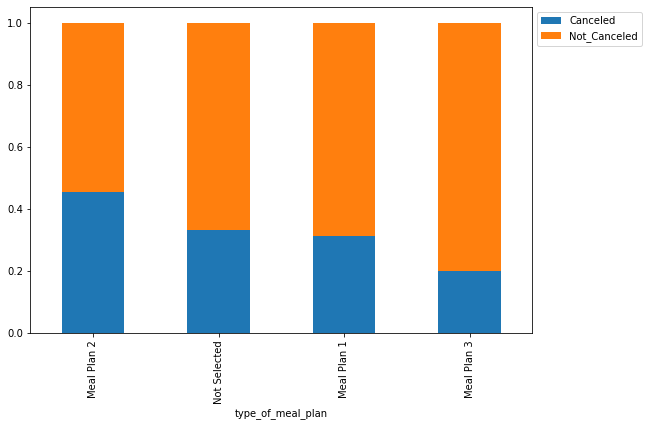

<IPython.core.display.Javascript object>

In [33]:
stacked_barplot(
    bookings, "type_of_meal_plan", "booking_status"
)  # creates stacked barplot of booking status with respect to type of meal plan

##### Observations:
    - The type of meal plan does seem to have a slight change in the cancellation status, keep in mind the meal plan type is not indicitave of a quantitative amount of meal plan. It is simply an indicator. However, since the 3rd meal plan is the most extravagent and assuming expensive it does make sense that this would require the smallest rate of cancellations for all of the meal plans.

### Booking Status vs Required Car Parking Space

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


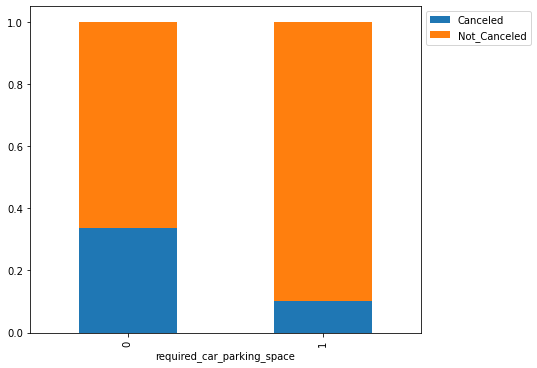

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(
    bookings, "required_car_parking_space", "booking_status"
)  # creates stacked barplot of booking status with respect to required car parking space

##### Observations:
    - The amount of data points showing that if a car parking space is required is small compared to the total amount of data points, however it does seem to show that if a parking spot is required by the customer then it is almost 90% certain that the customer will not cancel.

### Booking Status vs Room Type Reserved

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


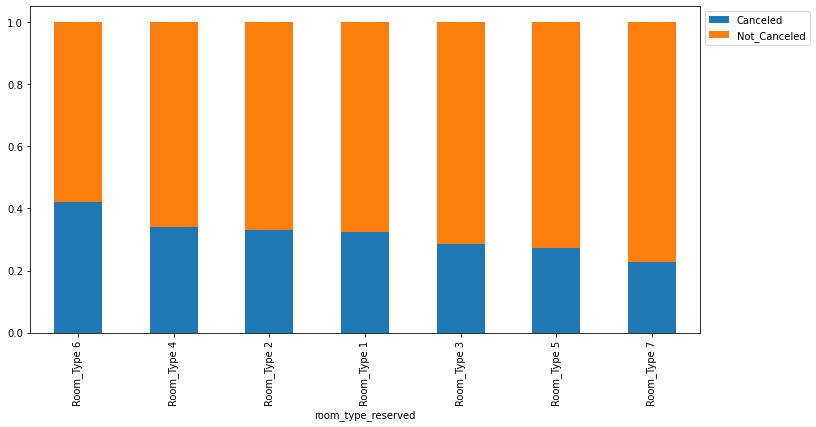

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(
    bookings, "room_type_reserved", "booking_status"
)  # creates stacked barplot of booking status with respect to room type reserved

##### Observations:
    - The type of room does seem to have a slight change in the cancellation status, keep in mind the room type is not indicitave of a quantitative amount of room types. It is seimply an indicator.

### Booking Status vs Arrival Year

booking_status  Canceled  Not_Canceled    All
arrival_year                                 
All                11885         24390  36275
2018               10924         18837  29761
2017                 961          5553   6514
------------------------------------------------------------------------------------------------------------------------


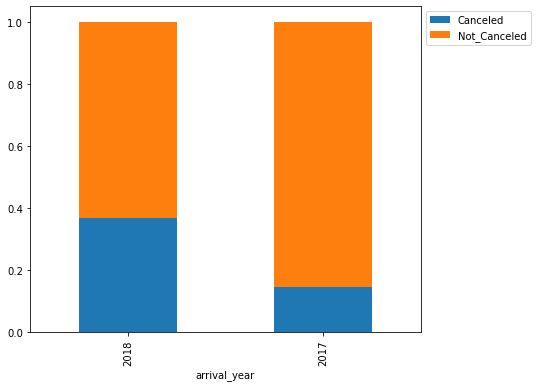

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(
    bookings, "arrival_year", "booking_status"
)  # creates stacked barplot of booking status with respect to arrival year

##### Observations:
    - It seems that there were much less cancellations in 2017 then compared to 2018. Difference being from about 85% in 2017 to about 63% in 2018. This seems to be a sharp drop in rate of cancellations.

### Booking Status vs Arrival Month

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


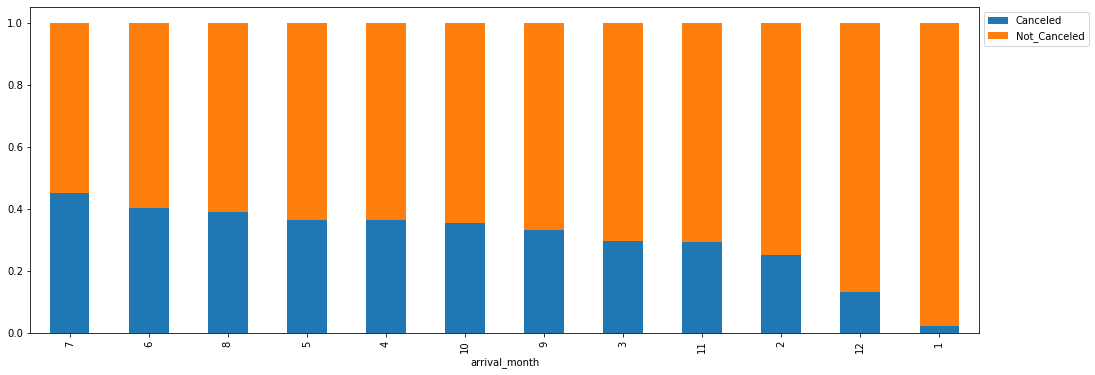

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(
    bookings, "arrival_month", "booking_status"
)  # creates stacked barplot of booking status with respect to arrival month

##### Observations:
    - It seems that the colder winter months have less of a chance of cancellation then compared to the warmer summer months.

### Booking Status vs Market Segment Type

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


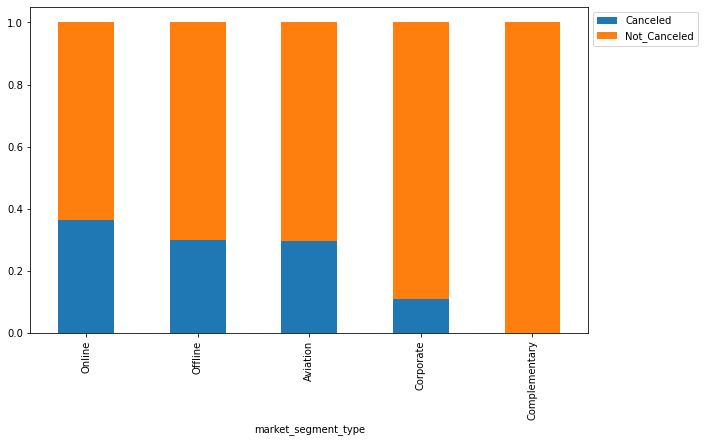

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(
    bookings, "market_segment_type", "booking_status"
)  # creates stacked barplot of booking status with respect to market segment type

##### Observations:
    - Complementary has no cancellations which makes sense since it is a free trip for the customer. Corporate is second which also makes sense since these reservations are for businees trips, and must be attended. These are also typically paid for by the company and not the employee staying in the room. Seeing how little the amount of corporate reservations there are, it is safe to believe that the majority of the resrvations are from couples with no children.

### Booking Status vs Repeated Guest

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


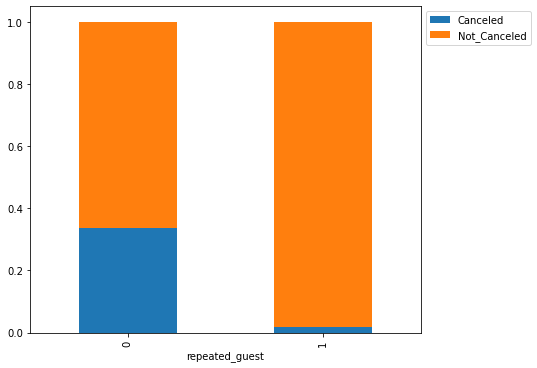

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(
    bookings, "repeated_guest", "booking_status"
)  # creates stacked barplot of booking status with respect to repeated guest

##### Observations:
    - There seems to be a correlation between a guest be a repeating guest and a guest not canceling. This makes sense as loyal customers seem to come back. I am sure with membership discounts and rewards the incentive to not cancel is too much.

### Booking Status vs Number of Previous Cancellations

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
4                                    0            10     10
5                                    0            11     11
6                                    0             1      1
11                                   0            25     25
------------------------------------------------------------------------------------------------------------------------


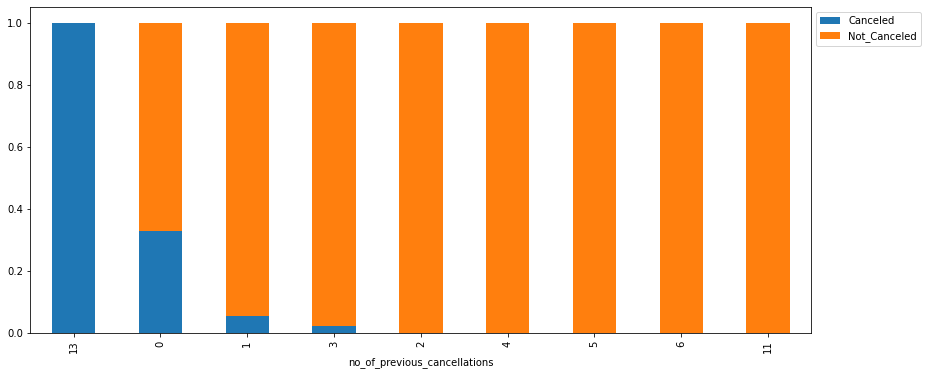

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(
    bookings, "no_of_previous_cancellations", "booking_status"
)  # creates stacked barplot of booking status with respect to number of previous cancellations

In [41]:
bookings[bookings["no_of_previous_cancellations"] == 13]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
12097,INN12098,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.0,0,Canceled
12109,INN12110,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.0,0,Canceled
16277,INN16278,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.0,0,Canceled
30833,INN30834,2,0,1,1,Meal Plan 1,0,Room_Type 1,190,2018,4,9,Offline,1,13,1,70.0,0,Canceled


<IPython.core.display.Javascript object>

##### Observations:
    - The number of cancellations seems to go down drastically after the number of previous cancellations goes beyond 0. The incentive to not repeat cancel seems to high to reject. The 13 seems to be an outlier that should be removed, since the 4 occurences of this value have all the exact same feature values for all data points. Thus, these four occurences should be removed. A person who has previously canceled is sure to book a reservation 96% of the time.

### Booking Status vs Number of Previous Bookings not Canceled

booking_status                        Canceled  Not_Canceled    All
no_of_previous_bookings_not_canceled                               
All                                      11885         24390  36275
0                                        11878         23585  35463
1                                            4           224    228
12                                           1            11     12
4                                            1            64     65
6                                            1            35     36
2                                            0           112    112
44                                           0             2      2
43                                           0             1      1
42                                           0             1      1
41                                           0             1      1
40                                           0             1      1
38                                           0  

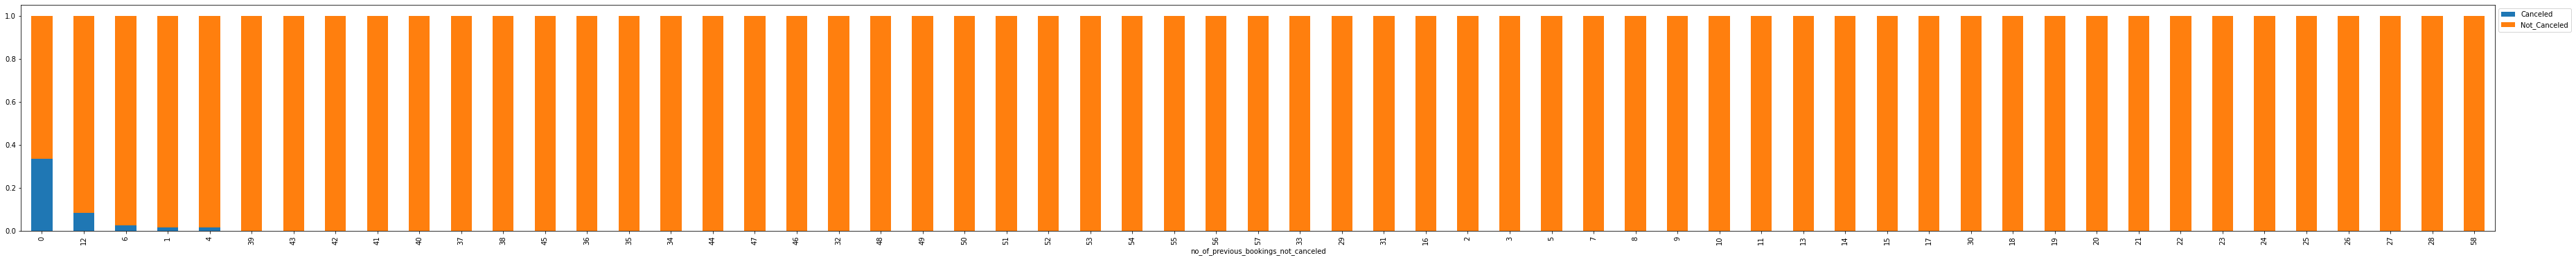

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(
    bookings, "no_of_previous_bookings_not_canceled", "booking_status"
)  # creates stacked barplot of booking status with respect to number of previous bookings not canceled

In [43]:
bookings[bookings["no_of_previous_bookings_not_canceled"] != 0][
    "booking_status"
].value_counts()

Not_Canceled    805
Canceled          7
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

##### Observations:
    - Any guest who has not canceled almost guarantees a guest will not cancel, thus it should be treated as a premium reward for the business to target. A person who has not previously canceled a reservation has a 99.6% chanve of not canceling.

### Booking Status vs Number of Special Requests

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


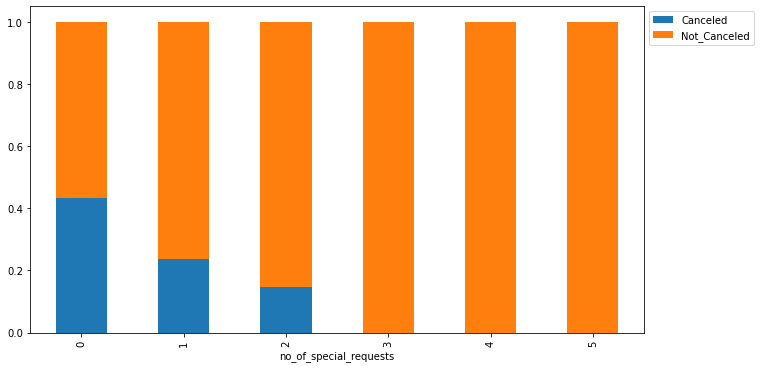

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(
    bookings, "no_of_special_requests", "booking_status"
)  # creates stacked barplot of booking status with respect to number of special requests

##### Observations:
    - As the number of specail requests rises the number of cancellations decreases. This makes sense as the number of specail request that increase means the customer is more picky and less likely/willing to cancel since all their needs are being met.

## Question 1: What are the busiest months in the hotel?

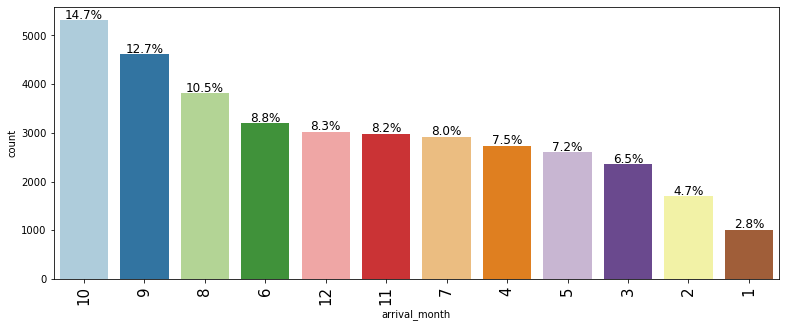

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(
    bookings, "arrival_month", perc=True, save_title="busiest_months"
)  # creates a labeled barplot showing the busiest months with their coresponding percentages

##### Observations:
    - The busiest month is October.
    - The later the months the busier the hotel seems to be.
    - This could be due to people having to see their families for the holidays, or an attempt to use all thei vacation days before they run out for the new year.

## Question 2: Which market segment do most of the guests come from?

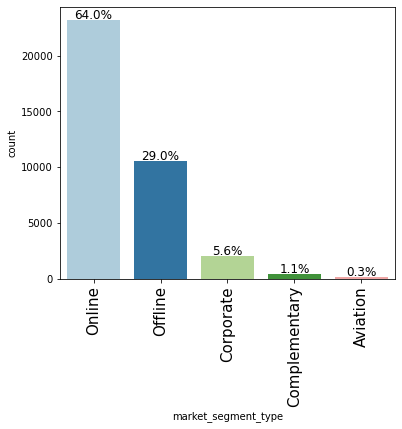

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(
    bookings, "market_segment_type", perc=True, save_title="busiest_market_segments"
)  # creates a labeled barplot showing the busiest market segment types with their coresponding percentages

##### Observations:
    - 64% of the guests come from reservations made online.
    - 29% of guest come from reservations made offline.
    - Corporate, Complimentary, and Aviation combine for about 7% of the rest of the reservations.
    - Online seems to be the biggest market segment by far. Increasing online presence may increase reservations.

## Question 3: Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

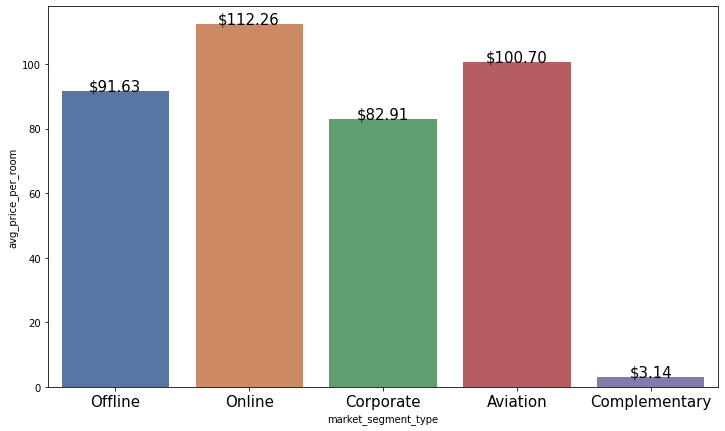

<IPython.core.display.Javascript object>

In [47]:
# plot of data frame made of just the market_segment_type and avg_price_per_room

total = len(bookings["market_segment_type"])  # length of the column
count = bookings["market_segment_type"].nunique()  # counts amount of unique values for
plt.figure(figsize=(12, 7))  # sets figure size

plt.xticks(fontsize=15)  # rotates tick labels 90 degrees
#     create barplot
ax = sns.barplot(
    data=bookings[["market_segment_type", "avg_price_per_room"]],
    x="market_segment_type",
    y="avg_price_per_room",
    palette="deep",  # sets color for plot
    ci=None,
)
#     creates labels on top of bars that are either counts or perentages of the whole column depending perc value
for p in ax.patches:
    label = "${:.2f}".format(p.get_height())  # count of each level of the category

    x = p.get_x() + p.get_width() / 2  # width of the plot
    y = p.get_height()  # height of the plot

    #         edits the labels to be the correct size and placement
    ax.annotate(
        label,
        (x, y),
        ha="center",
        va="center",
        size=15,
        xytext=(0, 5),
        textcoords="offset points",
    )  # annotate the percentage or the count

plt.savefig(
    "avg_room_price_per_market_segment.jpg", bbox_inches="tight"
)  # saves plot as JPEG
plt.show()  # show the plot

##### Observations:
    - Complimentary seems negligible in this column since they are free rooms. The $3 must be for room service and other such fees.
    - Online is the most expensive market, since it is also the most popular that would make sense.
    - Corporate is the cheapest, they must have deals worked out since they have multiple repeat employees traveling for work regualarly.

## Question 4: What percentage of bookings are canceled?

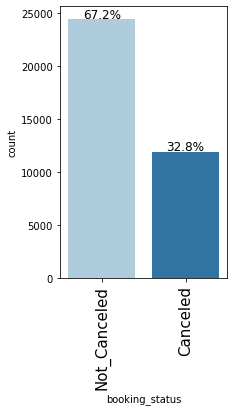

<IPython.core.display.Javascript object>

In [48]:
labeled_barplot(
    bookings, "booking_status", perc=True, save_title="percentage_bookings_canceled"
)  # creates a labeled barplot showing the booking status's with it's coresponding percentages

##### Observations:
    - About 32.8% of bookings are canceled.
    - 32.8% seems quite high.

## Question 5: Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [49]:
bookings.groupby("booking_status")["repeated_guest"].value_counts()

booking_status  repeated_guest
Canceled        0                 11869
                1                    16
Not_Canceled    0                 23476
                1                   914
Name: repeated_guest, dtype: int64

<IPython.core.display.Javascript object>

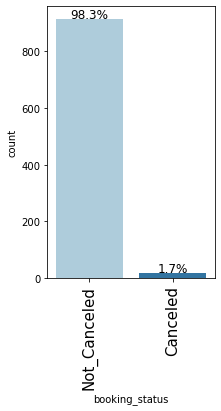

<IPython.core.display.Javascript object>

In [50]:
labeled_barplot(
    bookings[bookings["repeated_guest"] == 1],
    "booking_status",
    perc=True,
    save_title="repeated_guests_percentage_bookings_canceled",
)  # creates a labeled barplot showing the booking status's with it's coresponding percentages

##### Observations:
    - The number of cancelations drastically decreases when the guests are repeat guests.
    - It changes from 32.8% to 1.3%
    - Repeat customers definitely effect booking status.

## Question 6: Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancelation?

Null hypothesis:

>$H_0:$ Number of special requests is independent of booking status.

Alternate hypothesis:

>$H_a:$ Number of special requests depends on booking status.

In [51]:
from scipy.stats import chi2_contingency

bookings_special_request_booking_status = pd.crosstab(
    index=bookings["booking_status"], columns=bookings["no_of_special_requests"]
)
print(bookings_special_request_booking_status)

# df_language_preferred_converted.value_counts().drop("converted", axis=1)
chi, p_value, dof, expected = chi2_contingency(bookings_special_request_booking_status)
print("The p-value is", p_value)

no_of_special_requests      0     1     2    3   4  5
booking_status                                       
Canceled                 8545  2703   637    0   0  0
Not_Canceled            11232  8670  3727  675  78  8
The p-value is 0.0


<IPython.core.display.Javascript object>

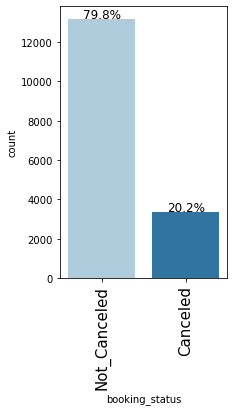

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(
    bookings[bookings["no_of_special_requests"] != 0],
    "booking_status",
    perc=True,
    save_title="special_requests_percentage_bookings_canceled",
)  # creates a labeled barplot showing the booking status's with it's coresponding percentages

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


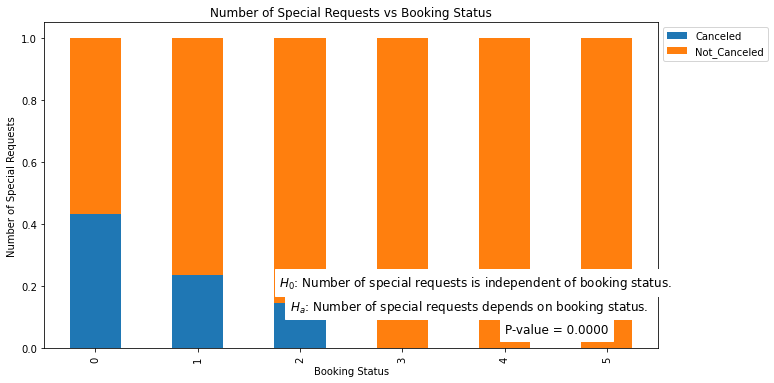

<IPython.core.display.Javascript object>

In [53]:
# creates stacked barplot of booking status with respect to number of special requests
count = bookings["no_of_special_requests"].nunique()
sorter = bookings["booking_status"].value_counts().index[-1]
tab1 = pd.crosstab(
    bookings["no_of_special_requests"], bookings["booking_status"], margins=True
).sort_values(by=sorter, ascending=False)
print(tab1)
print("-" * 120)
tab = pd.crosstab(
    bookings["no_of_special_requests"], bookings["booking_status"], normalize="index"
).sort_values(by=sorter, ascending=False)
tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
plt.legend(
    loc="lower left", frameon=False,
)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Number of Special Requests vs Booking Status")  # sets title
plt.xlabel("Booking Status")  # sets x label
plt.ylabel("Number of Special Requests")  # sets y label

# adds text box for null hypothesis, alternative hypothesis, and p-value
plt.text(
    x=1.8,
    y=0.2,
    s="$H_0$: Number of special requests is independent of booking status.",
    backgroundcolor="white",
    fontsize="large",
)
plt.text(
    x=1.9,
    y=0.125,
    s="$H_a$: Number of special requests depends on booking status.",
    backgroundcolor="white",
    fontsize="large",
)
plt.text(
    x=4,
    y=0.05,
    s="P-value = {:.4f}".format(p_value),
    backgroundcolor="white",
    fontsize="large",
)

plt.savefig(
    "special_requests_per_booking_status.jpg", bbox_inches="tight"
)  # save graph as JPEG
plt.show()

##### Observations:
    - The graph shows that any amount of special requests causes a sharp decrease in the amount of cancelations.
    - Since the p-value, for the chi-square test of independence, is 0. It is safe to assume that the number of special requests does effect the booking status.
    - The percentage of cancelations drops from 32.8% to 20.2% when the guest has made a special request.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [54]:
bookings = bookings[bookings["no_of_children"] != 9]
bookings = bookings[bookings["no_of_children"] != 10]
bookings = bookings[bookings["no_of_previous_cancellations"] != 13]

<IPython.core.display.Javascript object>

In [55]:
# creates dictionary showing what rows get replaced with in their given columns
replaceStruct = {
    "type_of_meal_plan": {
        "Meal Plan 1": 1,
        "Meal Plan 2": 2,
        "Meal Plan 3": 3,
        "Not Selected": -1,
    },
    "room_type_reserved": {
        "Room_Type 1": 1,
        "Room_Type 2": 2,
        "Room_Type 3": 3,
        "Room_Type 4": 4,
        "Room_Type 5": 5,
        "Room_Type 6": 6,
        "Room_Type 7": 7,
    },
    "booking_status": {"Not_Canceled": 0, "Canceled": 1},
}

# replaces values with the replaceStruct dictionary made above
bookings = bookings.replace(replaceStruct)

bookings.head()  # shows head of dataframe bookings

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,1,0,1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,INN00002,2,0,2,3,-1,0,1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,INN00003,1,0,2,1,1,0,1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,1,0,1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,INN00005,2,0,1,1,-1,0,1,48,2018,4,11,Online,0,0,0,94.50,0,1


<IPython.core.display.Javascript object>

### Treating Outliers
    - Lead time
    - Avg price per room

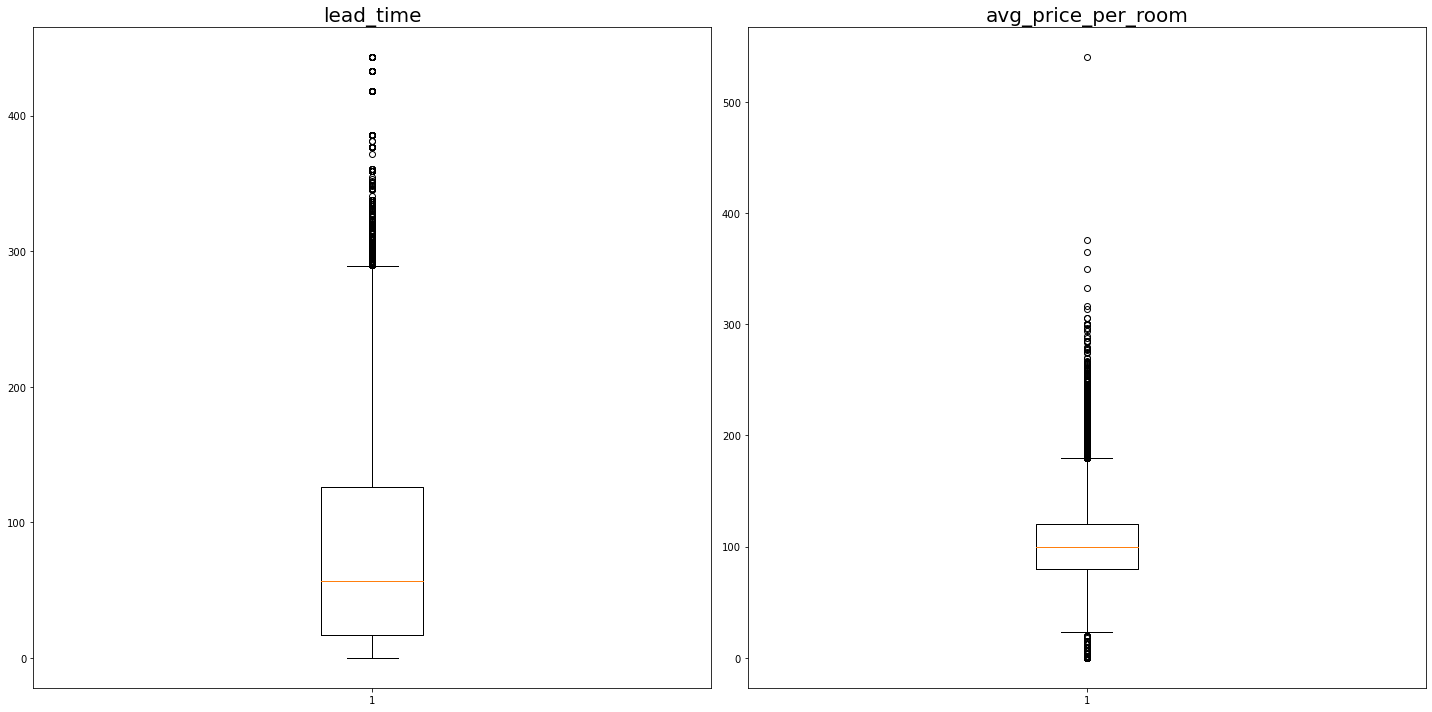

<IPython.core.display.Javascript object>

In [56]:
# create list of all numerical column names
numeric_cols = ["lead_time", "avg_price_per_room"]

plt.figure(figsize=(20, 10))

# print boxplots of all numerical values
for i, variable in enumerate(numeric_cols):
    plt.subplot(1, 2, i + 1)
    plt.boxplot(bookings[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.show()  # create list of all numerical column names

In [57]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    #   use treat_outliers on all columns in col_list in dataframe df
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

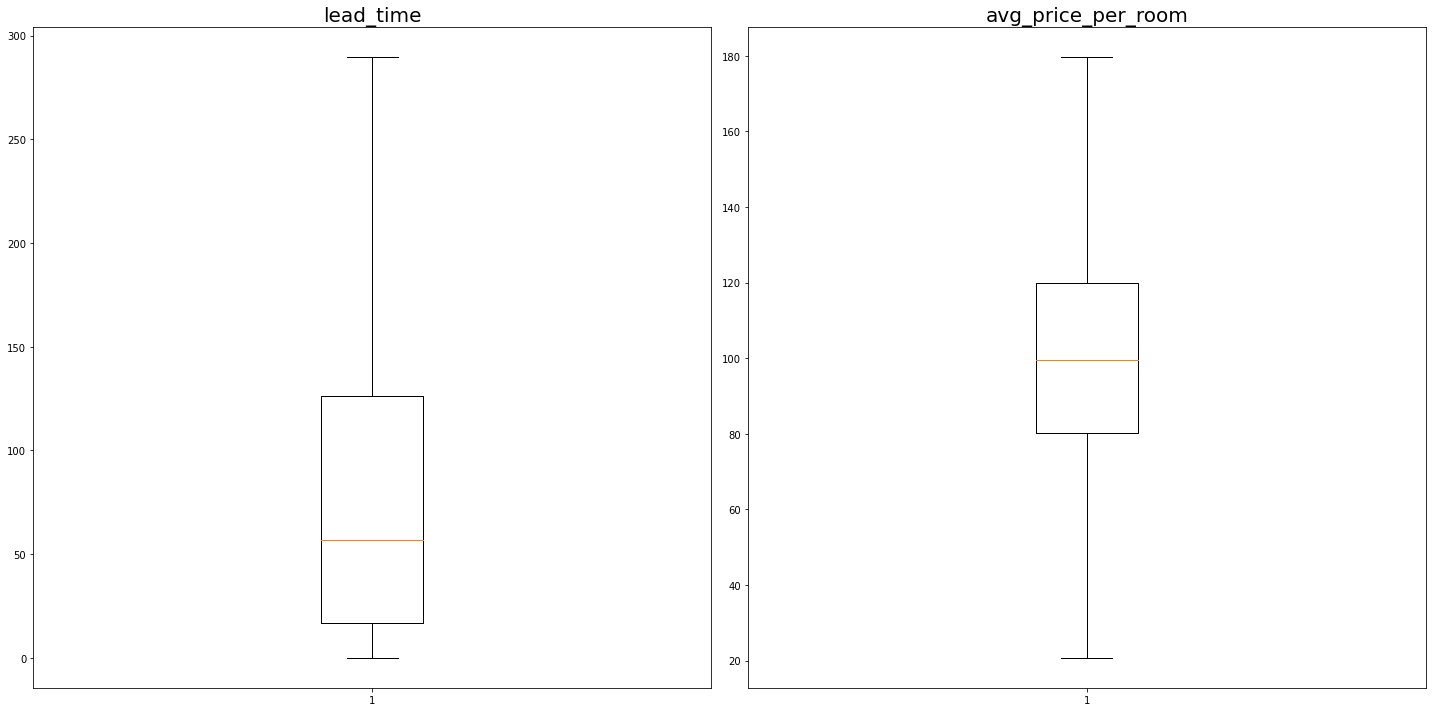

<IPython.core.display.Javascript object>

In [58]:
bookings = treat_outliers_all(
    bookings, numeric_cols
)  # set outliers to level of whiskers for all numeric columns except for ram

plt.figure(figsize=(20, 10))

# print boxplots of all numerical values
for i, variable in enumerate(numeric_cols):
    plt.subplot(1, 2, i + 1)
    plt.boxplot(bookings[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable, fontsize=20)

plt.show()

In [59]:
bookings["lead_time"].value_counts().reset_index().sort_values(
    by="index", ascending=False
)

,index,lead_time
0,289.5,1331
265,289.0,15
287,288.0,5
278,287.0,10
210,286.0,41
...,...,...
5,4.0,628
4,3.0,630
3,2.0,643
2,1.0,1078


<IPython.core.display.Javascript object>

In [60]:
bookings["avg_price_per_room"].value_counts().reset_index().sort_values(
    by="index", ascending=False
)

,index,avg_price_per_room
0,179.55,1069
3136,179.50,1
2922,179.38,1
3379,179.30,1
3490,179.25,1
...,...,...
355,31.00,11
3049,29.00,1
3222,26.35,1
3183,23.00,1


<IPython.core.display.Javascript object>

In [61]:
# takes out the mx value for the avg price per room, because it seems too far awya from teh rest of the outliers.
bookings = bookings[bookings["avg_price_per_room"] != 540.00]

<IPython.core.display.Javascript object>

In [62]:
# drop Booking ID as it is unneccassary fo rthe model.
bookings = bookings.drop("Booking_ID", axis=1)

<IPython.core.display.Javascript object>

In [63]:
bookings = pd.get_dummies(
    bookings, columns=["market_segment_type"], drop_first=True
)  # create dummy columns for all categorical columns
bookings

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,1,0,1,224.0,2017,10,2,0,0,0,65.00,0,0,0,0,1,0
1,2,0,2,3,-1,0,1,5.0,2018,11,6,0,0,0,106.68,1,0,0,0,0,1
2,1,0,2,1,1,0,1,1.0,2018,2,28,0,0,0,60.00,0,1,0,0,0,1
3,2,0,0,2,1,0,1,211.0,2018,5,20,0,0,0,100.00,0,1,0,0,0,1
4,2,0,1,1,-1,0,1,48.0,2018,4,11,0,0,0,94.50,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85.0,2018,8,3,0,0,0,167.80,1,0,0,0,0,1
36271,2,0,1,3,1,0,1,228.0,2018,10,17,0,0,0,90.95,2,1,0,0,0,1
36272,2,0,2,6,1,0,1,148.0,2018,7,1,0,0,0,98.39,2,0,0,0,0,1
36273,2,0,0,3,-1,0,1,63.0,2018,4,21,0,0,0,94.50,0,1,0,0,0,1


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

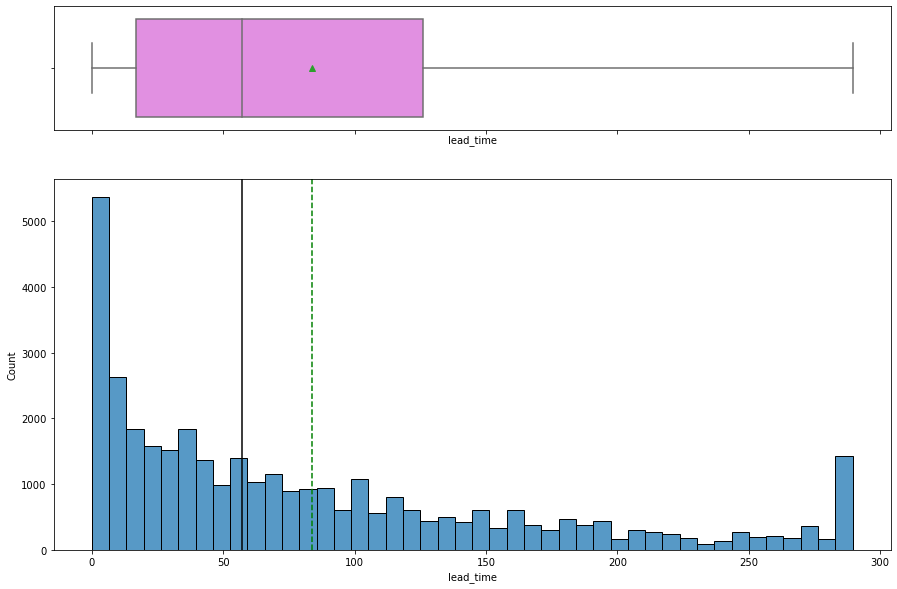

<IPython.core.display.Javascript object>

In [64]:
histogram_boxplot(
    bookings, "lead_time"
)  # plots boxplot and histogram of no_of_weekend_nights

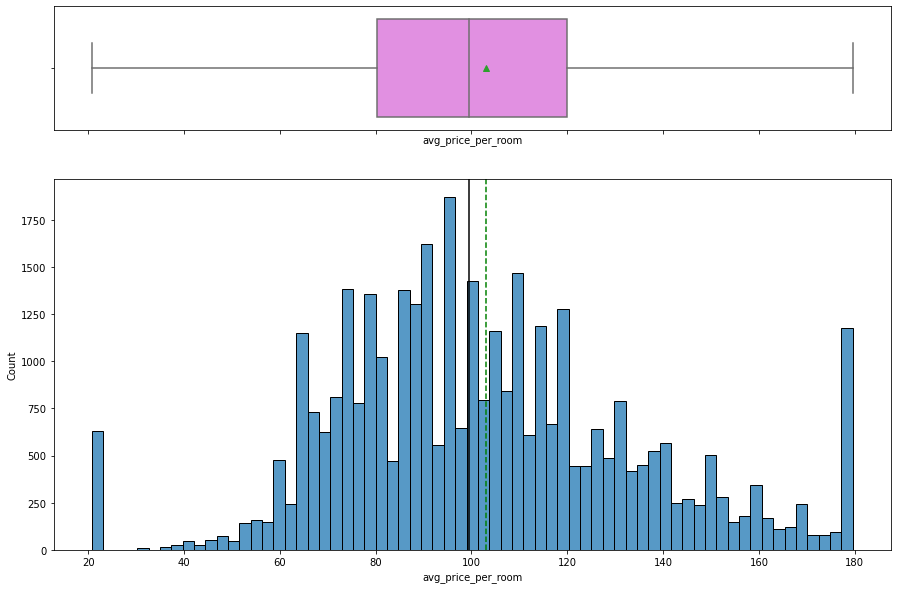

<IPython.core.display.Javascript object>

In [65]:
histogram_boxplot(
    bookings, "avg_price_per_room"
)  # plots boxplot and histogram of no_of_weekend_nights

#### Number of Children

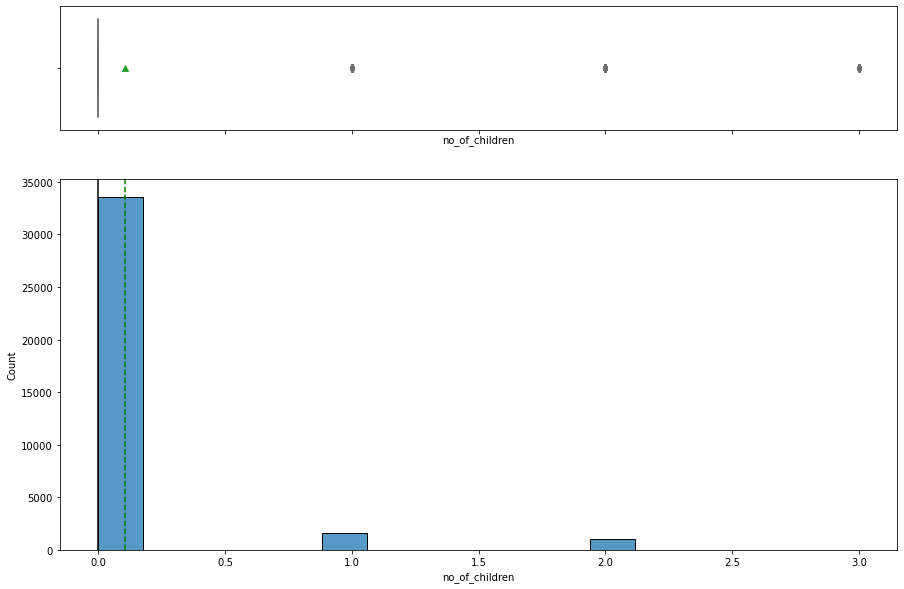

<IPython.core.display.Javascript object>

In [66]:
histogram_boxplot(
    bookings, "no_of_children"
)  # plots boxplot and histogram of no_of_weekend_nights

##### Observations:
    - The number of children are normally 0. This with the combination of the number of adults usually being 2, it is safe to assume that most reservations are made by couples needing a get away.
    - No normal distribution or need to remove outliers.

#### Type of Meal Plan

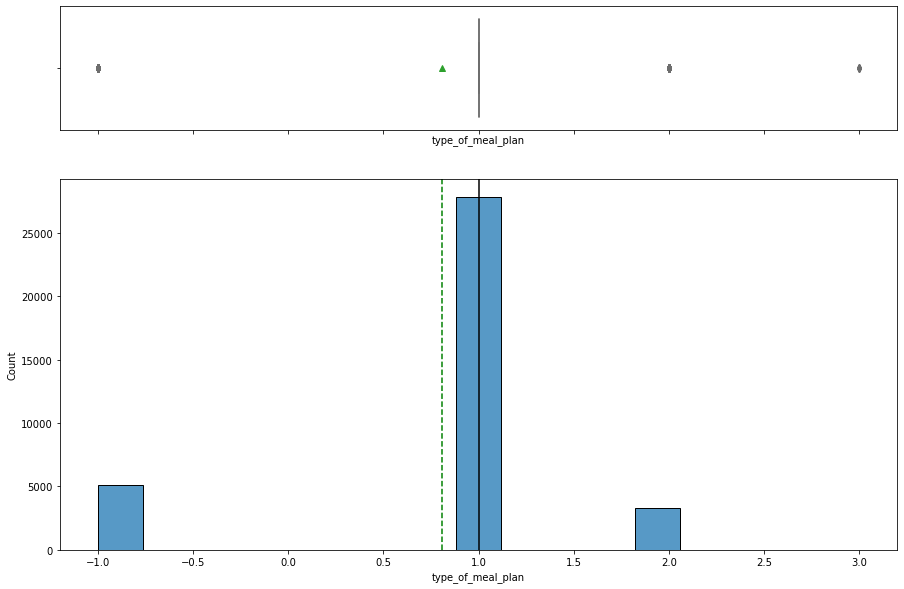

<IPython.core.display.Javascript object>

In [67]:
histogram_boxplot(
    bookings, "type_of_meal_plan"
)  # plots boxplot and histogram of no_of_weekend_nights

##### Observations:
    - The most popular meal plan is 1, which is also the worst and cheapest meal plan.
    - No normal distribution or need to remove outliers.

#### Room Type Reserved

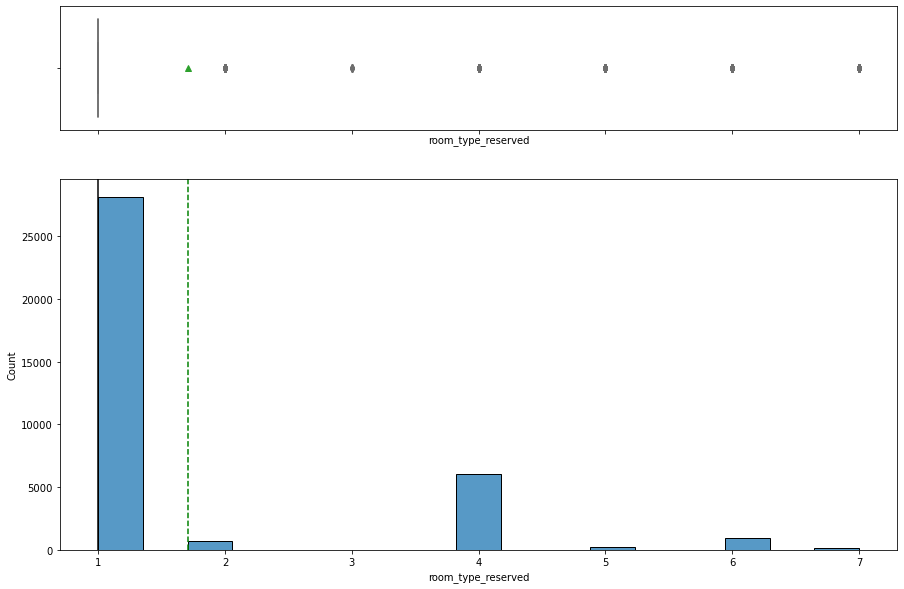

<IPython.core.display.Javascript object>

In [68]:
histogram_boxplot(
    bookings, "room_type_reserved"
)  # plots boxplot and histogram of no_of_weekend_nights

##### Observations:
    - The most popular room type reserved is 1.
    - No normal distribution or need to remove outliers.

#### Booking Status

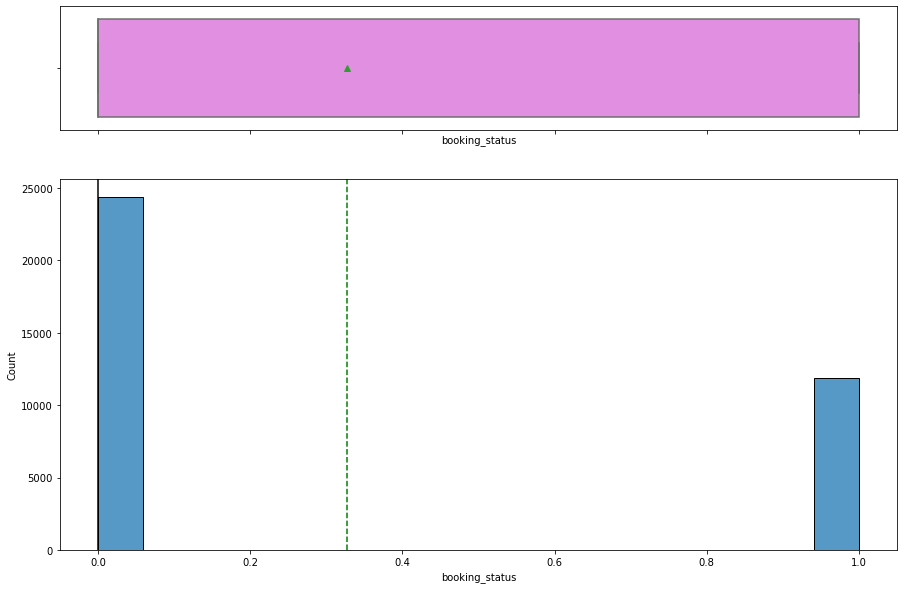

<IPython.core.display.Javascript object>

In [69]:
histogram_boxplot(
    bookings, "booking_status"
)  # plots boxplot and histogram of no_of_weekend_nights

##### Observations:
    - The booking status of being canceled or not seems to happen often nough that it does not create outliers. This shows an alarming truth to the hgih amount of cancellations received by the hotels.

booking_status      0      1    All
no_of_children                     
All             24388  11880  36268
0               22695  10878  33573
1                1078    540   1618
2                 601    457   1058
3                  14      5     19
------------------------------------------------------------------------------------------------------------------------


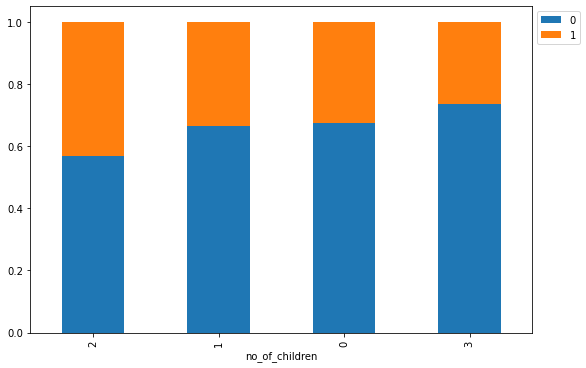

<IPython.core.display.Javascript object>

In [70]:
stacked_barplot(
    bookings, "no_of_children", "booking_status"
)  # creates stacked barplot of booking status with respect to market segment type

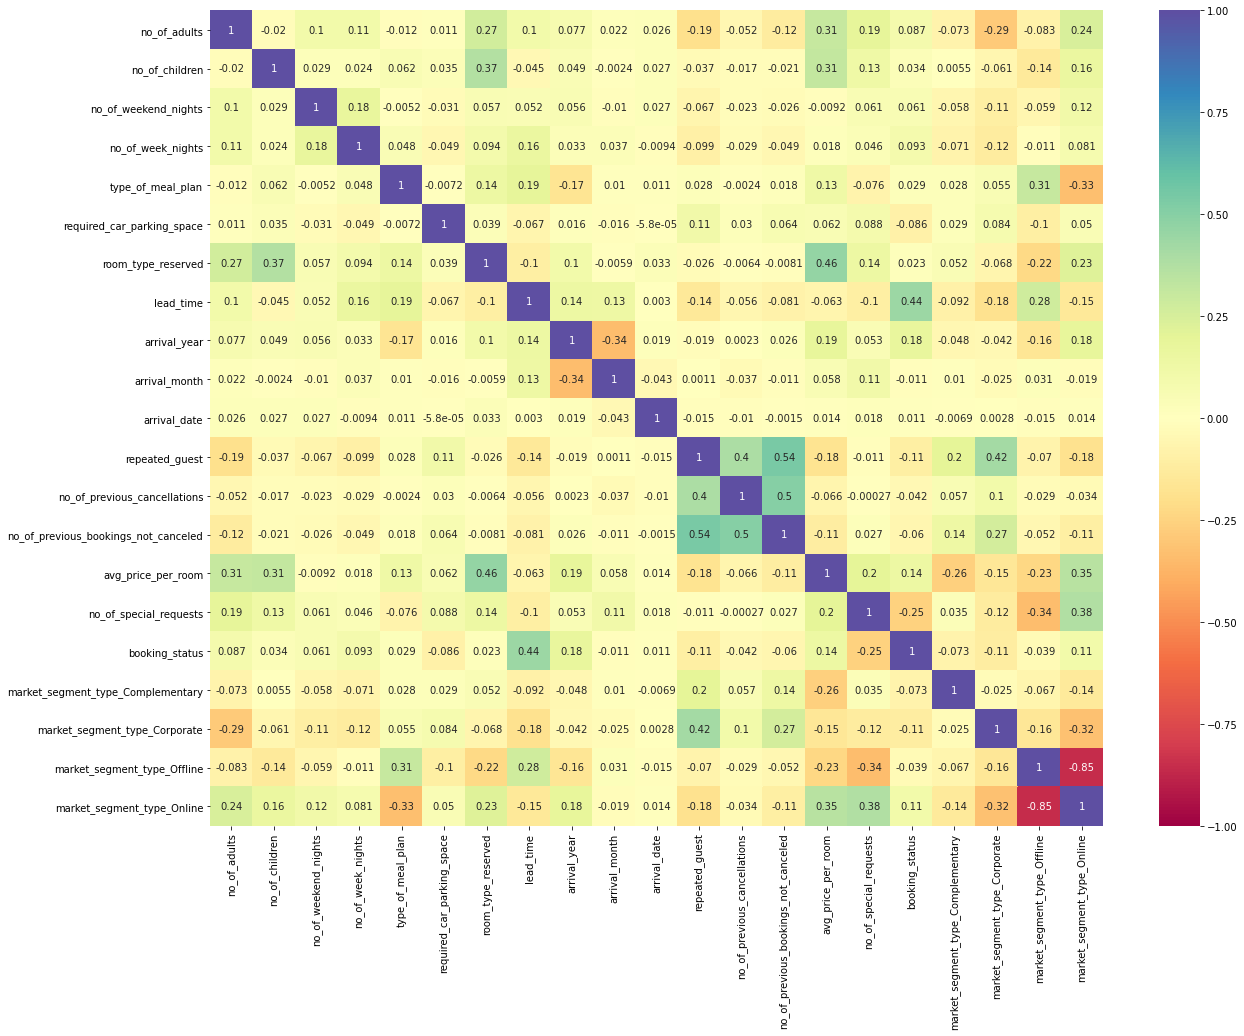

<IPython.core.display.Javascript object>

In [71]:
# creates heatmap showing corralation of data in bookings
plt.figure(figsize=(20, 15))
sns.heatmap(bookings.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

#### Observations
    - No real relationship with booking status, besides lead time.
    - market_segment_Offline and market segment_Online are strongly negatively correlated.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [72]:
# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [73]:
X = bookings.drop(
    "booking_status", axis=1
)  # sets X for train_split as df without used_price column
y = bookings["booking_status"]  # sets y as df with just the used_price column in it

# adding a constant for statsmodels and save as new X to not interfere with decision tree
X_lg = sm.add_constant(X)


print(y.head())  # prints the first 5 rows of y
X_lg.head()  # prints the first 5 rows of X

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64


,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,1.0,2,0,1,2,1,0,1,224.0,2017,10,2,0,0,0,65.00,0,0,0,1,0
1,1.0,2,0,2,3,-1,0,1,5.0,2018,11,6,0,0,0,106.68,1,0,0,0,1
2,1.0,1,0,2,1,1,0,1,1.0,2018,2,28,0,0,0,60.00,0,0,0,0,1
3,1.0,2,0,0,2,1,0,1,211.0,2018,5,20,0,0,0,100.00,0,0,0,0,1
4,1.0,2,0,1,1,-1,0,1,48.0,2018,4,11,0,0,0,94.50,0,0,0,0,1


<IPython.core.display.Javascript object>

In [74]:
# set train and test data sets for linear regression model as 70-30 split with same random state 1 for consistency
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(
    X_lg, y, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [75]:
checking_vif(X_train_lg)

,feature,VIF
0,const,3.817429e+07
1,no_of_adults,1.331485e+00
2,no_of_children,1.265997e+00
3,no_of_weekend_nights,1.072165e+00
4,no_of_week_nights,1.094576e+00
5,type_of_meal_plan,1.361019e+00
6,required_car_parking_space,1.036187e+00
7,room_type_reserved,1.561580e+00
8,lead_time,1.344891e+00
9,arrival_year,1.385427e+00


<IPython.core.display.Javascript object>

In [76]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [77]:
col_list = [
    "market_segment_type_Corporate",
    "market_segment_type_Offline",
    "market_segment_type_Online",
]

res = treating_multicollinearity(X_train_lg, y_train_lg, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,market_segment_type_Online,0.344890,0.379957
1,market_segment_type_Corporate,0.344772,0.379991
2,market_segment_type_Offline,0.344282,0.380133


<IPython.core.display.Javascript object>

In [78]:
col_to_drop = "market_segment_type_Online"
X_train_lg1 = X_train_lg.loc[:, ~X_train_lg.columns.str.startswith(col_to_drop)]
X_test_lg1 = X_test_lg.loc[:, ~X_test_lg.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(X_train_lg1)
print("VIF after dropping", col_to_drop)
vif

VIF after dropping market_segment_type_Online


,feature,VIF
0,const,3.809404e+07
1,no_of_adults,1.317302e+00
2,no_of_children,1.263696e+00
3,no_of_weekend_nights,1.071791e+00
4,no_of_week_nights,1.093685e+00
5,type_of_meal_plan,1.358302e+00
6,required_car_parking_space,1.036039e+00
7,room_type_reserved,1.557961e+00
8,lead_time,1.340080e+00
9,arrival_year,1.382865e+00


<IPython.core.display.Javascript object>

## Building a Logistic Regression model

In [79]:
# fitting logistic regression model
logit = sm.Logit(y_train_lg, X_train_lg1.astype(float))
lg_model = logit.fit(disp=False)

print(lg_model.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25387
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           19
Date:                Thu, 18 Nov 2021   Pseudo R-squ.:                  0.3273
Time:                        21:54:47   Log-Likelihood:                -10804.
converged:                      False   LL-Null:                       -16061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -773.3117    117.175     -6.600      0.000   -1002.971    -543.653
no_of_adults                             0.1454      

C:\Users\theijligers\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<IPython.core.display.Javascript object>

## Model performance evaluation

### Model criteria
    - The hotel loses money when the model predicts someone to not cancel, but does end up canceling. Since canceling is 1(positive), then we must reduce the amount of false negatives. Thus, it is best to focus on reducing the recall value.

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [81]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [82]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [83]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [84]:
lg_model_train_perf = model_performance_classification_statsmodels(
    lg_model, X_train_lg1, y_train_lg
)
lg_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.802616,0.629821,0.730898,0.676605


<IPython.core.display.Javascript object>

In [85]:
# checking model performance on train set (seen 70% data)
lg_model_train_perf = model_performance_classification_statsmodels(
    lg_model, X_test_lg1, y_test_lg
)
lg_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.803327,0.632556,0.729809,0.677711


<IPython.core.display.Javascript object>

In [86]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train_lg, lg_model.predict(X_train_lg1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.3693868574577752


<IPython.core.display.Javascript object>

In [87]:
# checking model performance on train set (seen 70% data)
lg_model_train_perf = model_performance_classification_statsmodels(
    lg_model, X_train_lg1, y_train_lg, threshold=optimal_threshold
)
lg_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.79135,0.73351,0.664743,0.697435


<IPython.core.display.Javascript object>

In [88]:
# checking model performance on train set (seen 70% data)
lg_model_test_perf = model_performance_classification_statsmodels(
    lg_model, X_test_lg1, y_test_lg, threshold=optimal_threshold
)
lg_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.794045,0.743323,0.66566,0.702351


<IPython.core.display.Javascript object>

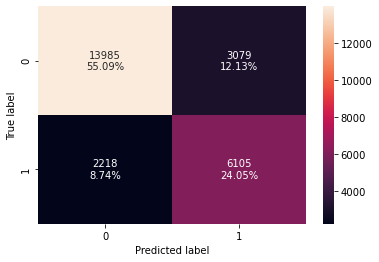

<IPython.core.display.Javascript object>

In [89]:
# creates a confusion matrix through a heatmap

confusion_matrix_statsmodels(
    lg_model, X_train_lg1, y_train_lg, threshold=optimal_threshold
)

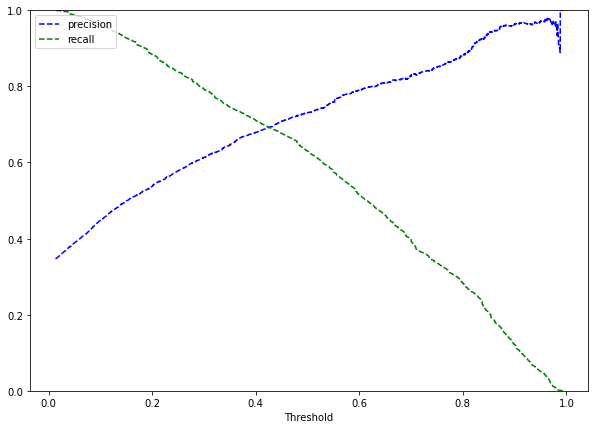

<IPython.core.display.Javascript object>

In [90]:
y_scores = lg_model.predict(X_train_lg1)
prec, rec, tre = precision_recall_curve(y_train_lg, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

## Final Model Summary

- All the models are giving a generalized performance on training and test set.
- The recall is about 74% on the training set.
- Using the model with default threshold the model will give a low recall but good precision scores - This model will help the hotel on potential oppurtunites, but lose more from the incorrect cancelation predictions that will leave rooms empty.
- Using the model with the optimum threshold, of 0.37, the model will give a higher recall, yet lower precision. This means that the hotel will not incorrectly guess when someone will not cancel but they do cancel, at the cost of rejecting more guests that will not cancel.
- The oprimum threshold led to an increase in recall of 0.2 and a decrease in precision of 0.07.

## Building a Decision Tree model

- Since we used X_lg for the logistic regression model and did not change X we can use it now to split the data for the decision tree.

In [91]:
# splits the data for the decision tree model dtree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# creates a decision tree model with random state = 1
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(X_train, y_train)  # fits the data to the model

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

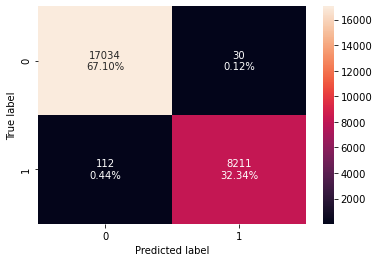

<IPython.core.display.Javascript object>

In [92]:
confusion_matrix_sklearn(
    dtree, X_train, y_train
)  # creates a confusion matrix through a heatmap

In [93]:
# creates a performance classifiacation
decision_tree_perf_train = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.994407,0.986543,0.99636,0.991427


<IPython.core.display.Javascript object>

In [94]:
# creates a performance classifiacation
decision_tree_perf_test = model_performance_classification_sklearn(
    dtree, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.865454,0.806016,0.787421,0.79661


<IPython.core.display.Javascript object>

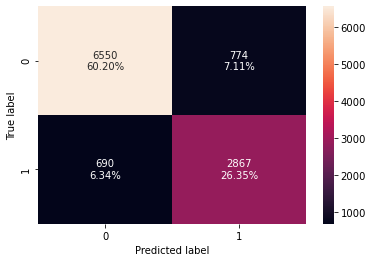

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_sklearn(
    dtree, X_test, y_test
)  # creates a confusion matrix through a heatmap

- The test metrics and train metrics are not generalized, so we must do some post-pruning on the decision tree.

## Do we need to prune the tree?

The tree needs to be pruned in order to generalize the data and create recall and accuracy scores the closer resemble one another.

In [96]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [97]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0758926294399303


<IPython.core.display.Javascript object>

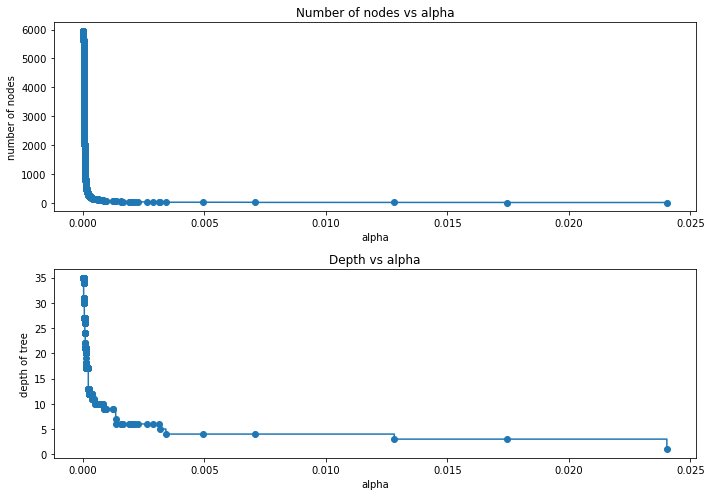

<IPython.core.display.Javascript object>

In [98]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [99]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [100]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

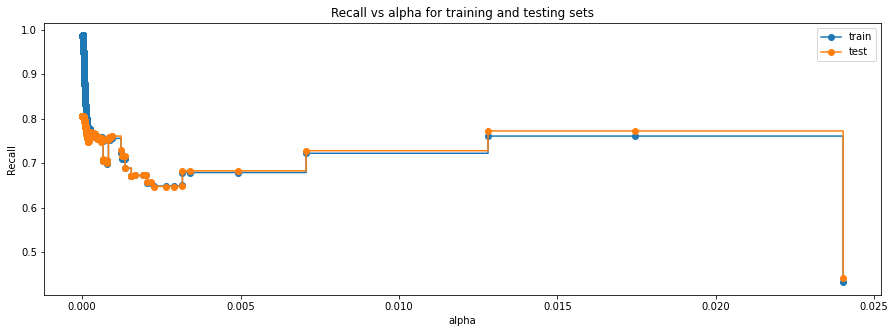

<IPython.core.display.Javascript object>

In [101]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Excluding the first 575 nodes will make up for initial seperate of the test recall and the train recall. Thus, giving us the best recall and the best model for what is needed.

In [102]:
clfs1 = clfs[575:-1]
ccp_alphas1 = ccp_alphas[575:-1]

<IPython.core.display.Javascript object>

In [103]:
recall_train1 = []
for clf in clfs1:
    pred_train4 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train4)
    recall_train1.append(values_train)

<IPython.core.display.Javascript object>

In [104]:
recall_test1 = []
for clf in clfs1:
    pred_test4 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test4)
    recall_test1.append(values_test)

<IPython.core.display.Javascript object>

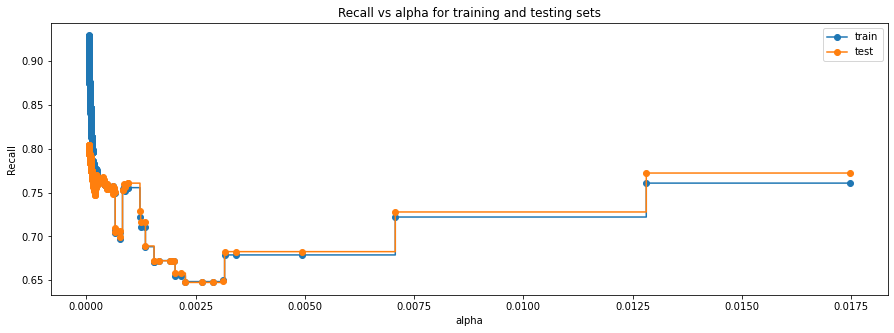

<IPython.core.display.Javascript object>

In [105]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas1, recall_train1, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas1, recall_test1, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [106]:
# creating the model where we get highest train and test recall
index_best_dtree = np.argmax(recall_test1)
best_dtree = clfs1[index_best_dtree]
print(best_dtree)

DecisionTreeClassifier(ccp_alpha=5.602167338489075e-05, random_state=1)


<IPython.core.display.Javascript object>

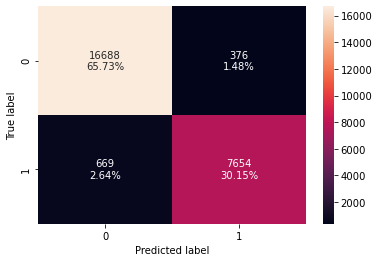

<IPython.core.display.Javascript object>

In [107]:
confusion_matrix_sklearn(
    best_dtree, X_train, y_train
)  # creates a confusion matrix through a heatmap

In [108]:
# creates a performance classifiacation
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_dtree, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.958837,0.91962,0.953176,0.936097


<IPython.core.display.Javascript object>

In [109]:
# creates a performance classifiacation
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_dtree, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.87685,0.804048,0.816443,0.810198


<IPython.core.display.Javascript object>

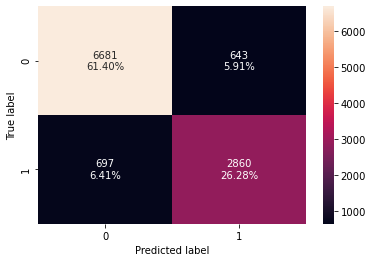

<IPython.core.display.Javascript object>

In [110]:
confusion_matrix_sklearn(
    best_dtree, X_test, y_test
)  # creates a confusion matrix through a heatmap

In [111]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_dtree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.358534
avg_price_per_room                    0.170700
market_segment_type_Online            0.104489
no_of_special_requests                0.079836
arrival_date                          0.070095
arrival_month                         0.063002
no_of_week_nights                     0.038153
no_of_adults                          0.035384
no_of_weekend_nights                  0.029624
arrival_year                          0.013265
type_of_meal_plan                     0.011876
room_type_reserved                    0.008674
required_car_parking_space            0.008113
no_of_children                        0.004649
market_segment_type_Offline           0.002831
market_segment_type_Corporate         0.000386
no_of_previous_cancellations          0.000230
repeated_guest                        0.000158
no_of_previous_bookings_not_canceled  0.000000
market_segment_type_Complementary     0.000000


<IPython.core.display.Javascript object>

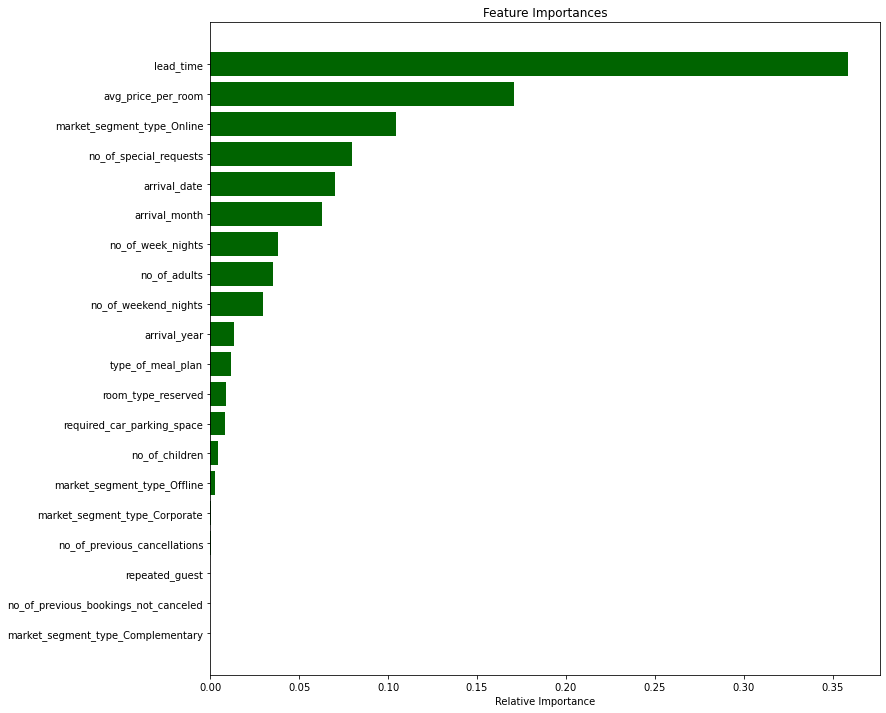

<IPython.core.display.Javascript object>

In [112]:
importances = best_dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="darkgreen", align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig(
    "decision_tree_feature_importances.jpg", bbox_inches="tight"
)  # save graph as JPEG
plt.show()

- All the models are giving a generalized performance on training and test set.
- The recall is about 77% on the training set.
- Using the model with the optimum ccp_alpha, of 0.00022, the model will give the higheest recall to the test data while still generalizing the data.
- The number of previous cancellations is not important to the decision tree, neither is the repeated guest column. They do not provide the truth into telling determining which bookings will cancel.
- The most important feature by far is the lead time. The greater the lead time to greater the chance of a cancellation.

## Model Performance Comparison and Conclusions

### Logistic Regression Model Perfromancs

In [113]:
dfi.export(lg_model_test_perf, "LG_test_performance.jpg")  # saves dataframe as image
lg_model_test_perf  # shows performance metrics of the logistic Regression model on the test set.

,Accuracy,Recall,Precision,F1
0,0.794045,0.743323,0.66566,0.702351


<IPython.core.display.Javascript object>

### Decision Tree Model Performance

In [114]:
dfi.export(
    decision_tree_postpruned_perf_test, "DTree_test_performance.jpg"
)  # saves dataframe as image
decision_tree_postpruned_perf_test  # shows performance metrics of the Decision Tree model on the test set.

,Accuracy,Recall,Precision,F1
0,0.87685,0.804048,0.816443,0.810198


<IPython.core.display.Javascript object>

### Overall Model Comparison

- The decision tree model is better in all performance metrics.
    + Decision Tree beats the Logistic Regression model Accuracy score by 0.08.
    + Decision Tree beats the Logistic Regression model Recall score by 0.03.
    + Decision Tree beats the Logistic Regression model Precision score by 0.17.
    + Decision Tree beats the Logistic Regression model F1 score by 0.1.
    
- The decision tree is the predictive model that should be used as it wins in all metrics. It will provide the best predictive booking status so that hotels can correctly predict when customers will cancel

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

In [115]:
bookings.groupby("booking_status")["lead_time"].value_counts()[1]

lead_time
289.5    1069
188.0     142
166.0     122
245.0     111
1.0       110
         ... 
283.0       3
264.0       2
269.0       2
284.0       2
289.0       2
Name: lead_time, Length: 291, dtype: int64

<IPython.core.display.Javascript object>

## Insights and Recommendations

1. The greater the lead time the greater the chance a cancellation will occur. Thus, there should be policies stating that a booking made as far out as about 150-200 days should be given an extra non-refundable fee to ensure they do not cancel.

2. Since cancellation only occurs at a rate of 1.3% when the booking is made by a repeated guest, repeated guest should get special rewards. A membership receiving free stays after a certain amount of stays, based on a points system, would be a good option. The reservation fee on long lead times may be waived as well.

3. Online reservations make up 64% of the reservations, they also have the highest rate of cancellations compared to other market segment types. They have a cancellation rate of almost 35% of the time. Thus, there should be an extra premium attached to online reservations.

4. If someone has previously cancelled a booking they are 96% sure to not cancel a booking again.

5. If someone has not previously canceled a booking but they have booked a reservation before, then they are 99.6% sure to not cancel.

6. It can be concluded that most cancellations happen with first time users. Thus, repeat customers will help drastically reduce the number of cancellations. Attracting repeat customers with promos and discounts will help decrease cancellations, as the repeat customer almost never cancels.